In [1]:
import os
c = os.getcwd()
os.chdir("../")
from Flocking import *
from graph_utils import *
from dynamics import *
os.chdir(c)

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def get_net(Q):
    G = nx.Graph()

    for i in range(0,N):
        for j in range(0,N):
            if (np.linalg.norm(Q[i,:]-Q[j,:])<r):
                if(not G.has_edge(i,j)):
                    G.add_edge(i,j)
    return(G)

def rho_h(z,h=0.2):
    if (0 <= z and z < h):
        return 1
    if (h <= z and z <= 1):
        return (1/2)*(1+np.cos(np.pi*(z-h)/(1-h)))
    else:
        return 0
    
def sigma_norm(z,epsilon=0.1):
    return (1/epsilon)*(np.sqrt(1+epsilon*(np.linalg.norm(z))**2)-1)

def sigma_grad(z,epsilon=0.1):
    return z/(1+epsilon*sigma_norm(z,epsilon))

def sigma_1(z):
    return z/(np.sqrt(1+z**2))

def phi(z,a=5,b=5):
    c = np.abs(a-b)/(np.sqrt(4*a*b))
    return (1/2)*((a+b)*sigma_1(z+c)+(a-b))

def phi_alpha(z,d,r):
    r_alpha = sigma_norm(r)
    d_alpha = sigma_norm(d)
    return rho_h(z/r_alpha)*phi(z-d_alpha)

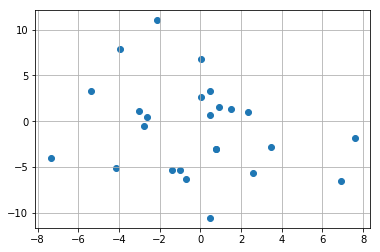

In [2]:
N=25
d=7
r=1.2*d
h=0.2
Q = np.sqrt(25)*np.random.randn(N,2)
P = (10)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

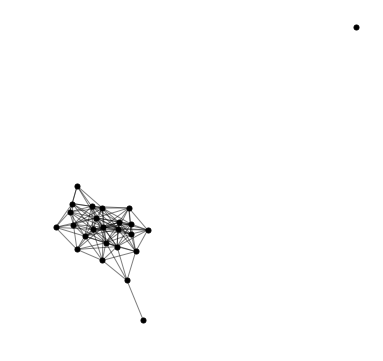

In [3]:
G = get_net(Q)
p=draw_graph(G,node_size=25,fig_size=6)

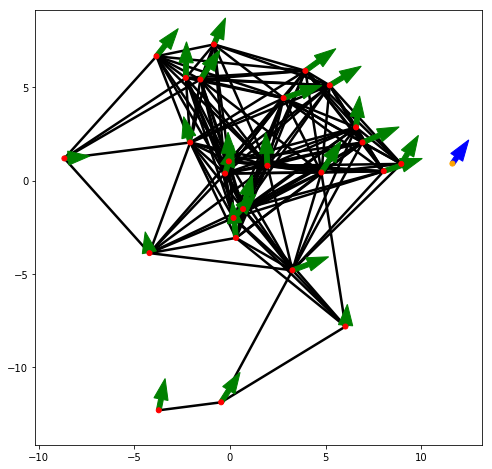

In [4]:
F = Flock(P_dot,
          number_of_agents=25,
          gamma_agent=True)

p = F.plot(Graph=True)

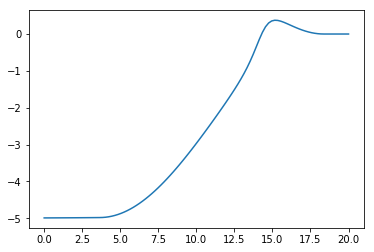

In [5]:
z = np.linspace(0,20,100)
y = np.zeros(len(z))
for i in range(0,len(y)):
    y[i] = phi_alpha(z[i],d,r)
    
plt.plot(z,y)

In [6]:
def time_step(Q,P,dt=0.01):
    G = get_net(Q)
    P = P + dt*P_dot(Q,G)
    Q = Q + dt*P
    return Q,P

In [7]:
T=10
dt=0.01
t=0
while t<T:
    Q,P = time_step(Q,P)
    t = t+dt

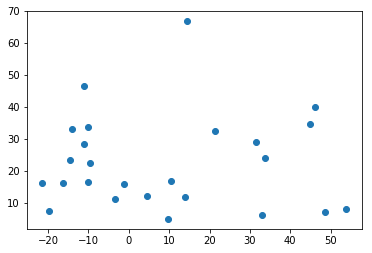

In [8]:
plt.scatter(Q[:,0],Q[:,1])

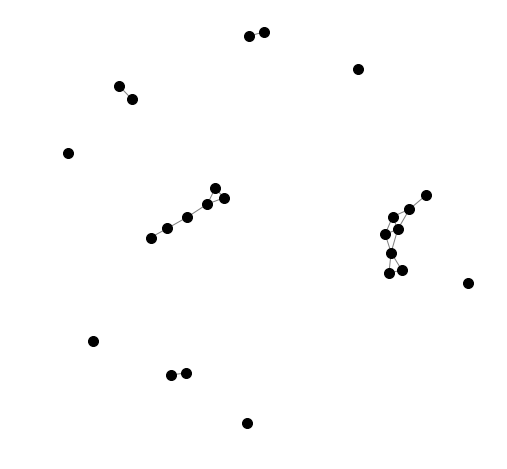

In [9]:
p=draw_graph(get_net(Q))

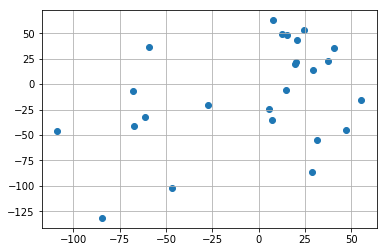

In [4]:
N=25
Q = np.sqrt(2500)*np.random.randn(N,2)
P = (10)*np.random.rand(N,2)-1
plt.scatter(Q[:,0],Q[:,1])
plt.grid()

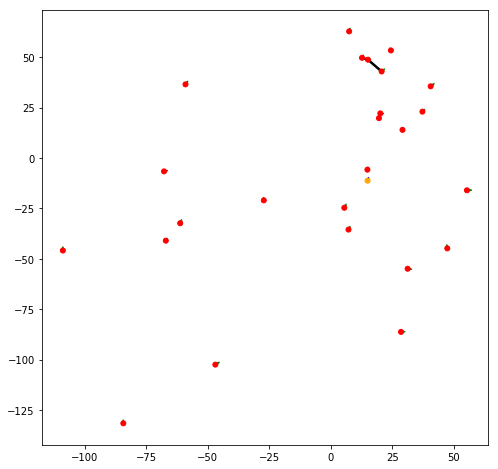

In [5]:
F = Flock(number_of_agents=25,
          initial_position=Q,
          initial_velocity=P,
          inter_agent_distance=7,
          gamma_agent=True)

p = F.plot(arrow_width=0.25)

In [6]:
F.run_sim(T=10,save_data=True)

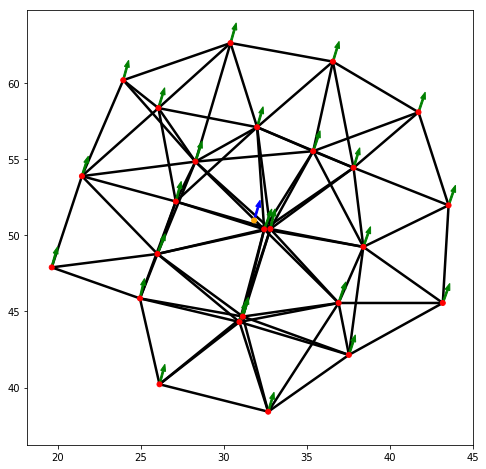

In [7]:
q=F.plot(arrow_width=0.1)

In [24]:
max(1,max(F.Q_sim[1][:,0]))

55.473625935208894

/home/harvey/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


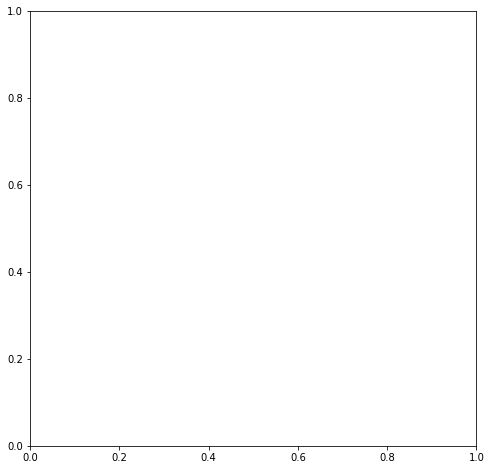

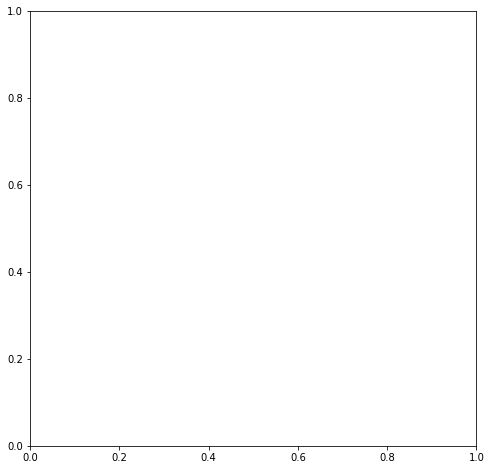

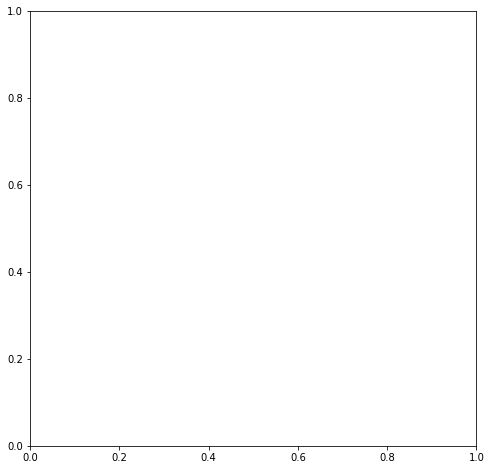

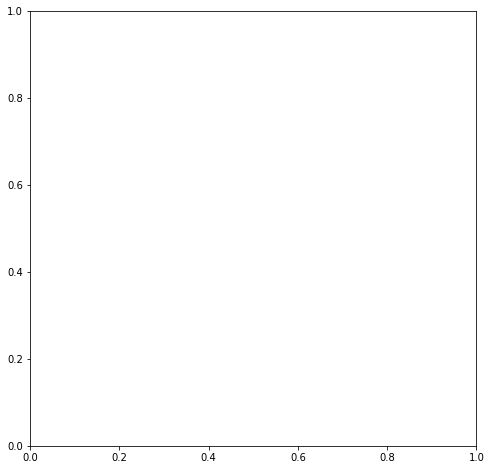

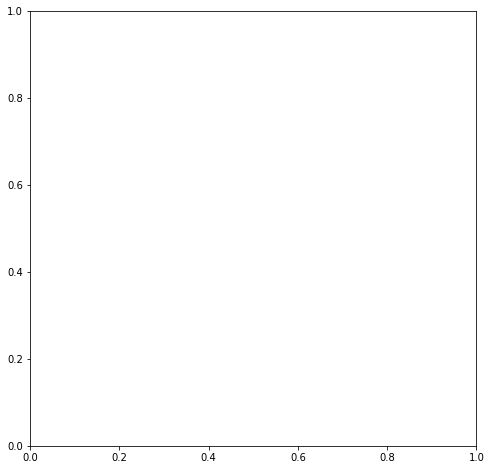

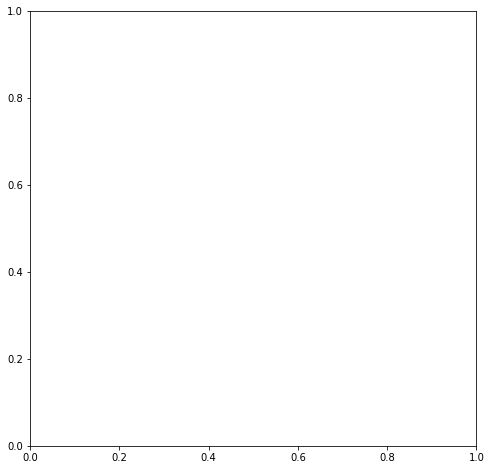

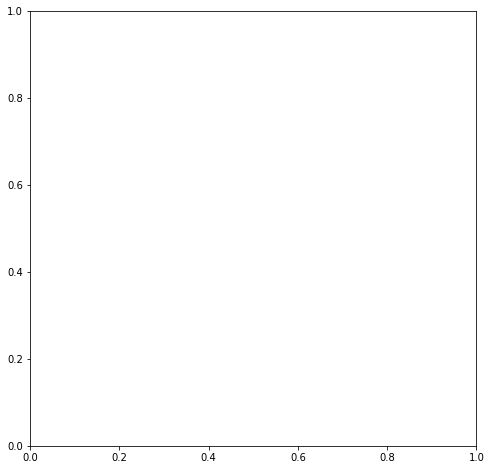

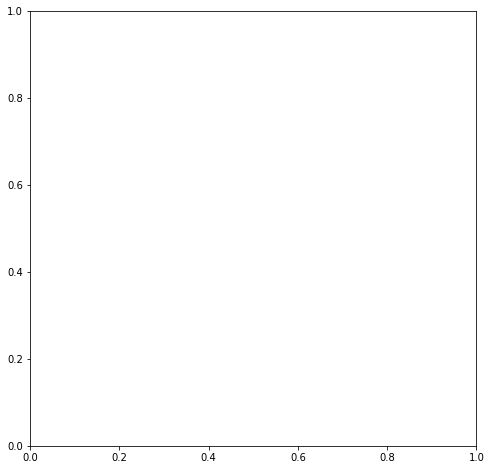

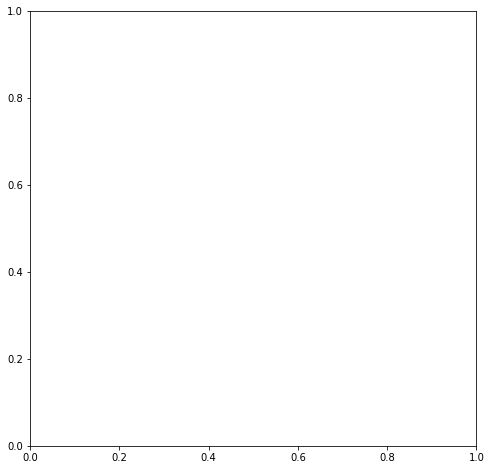

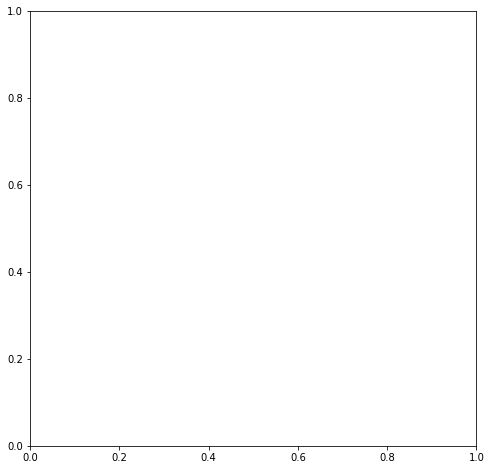

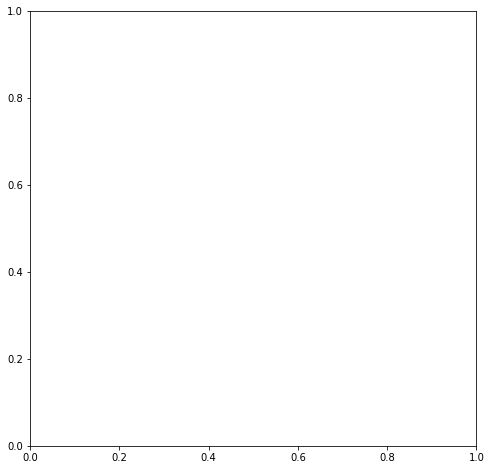

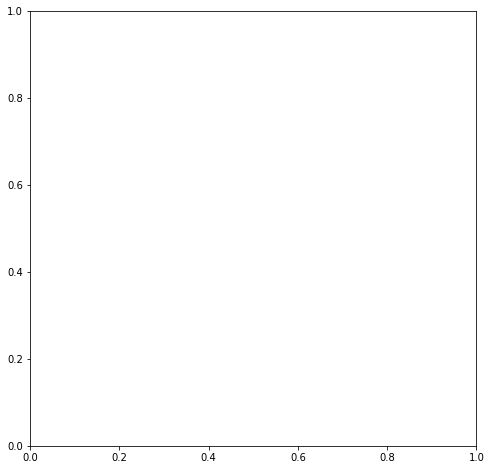

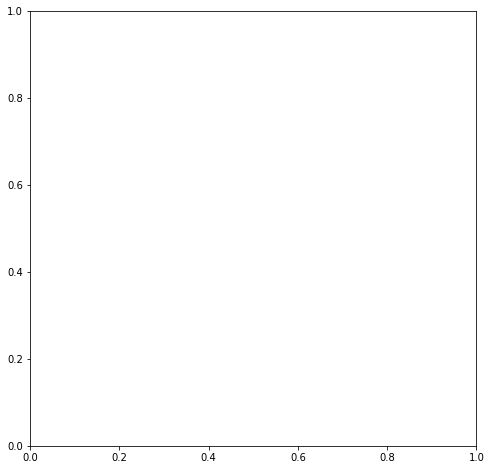

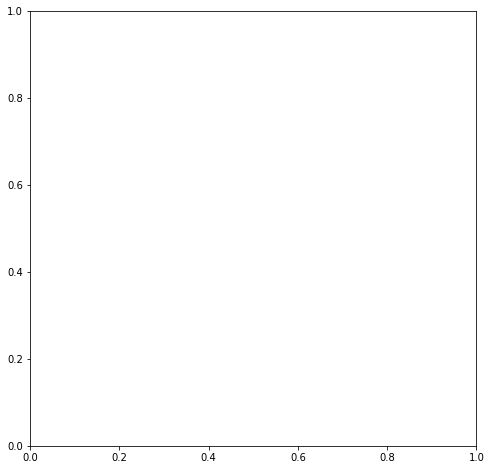

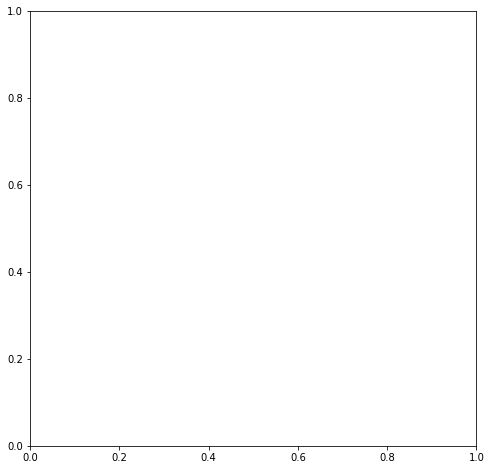

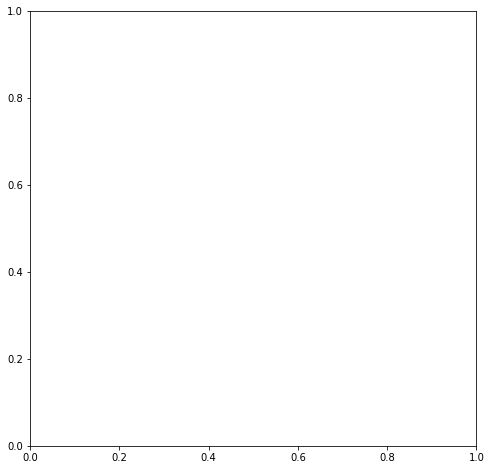

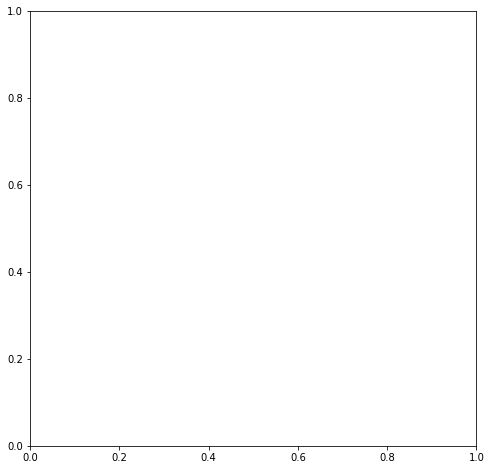

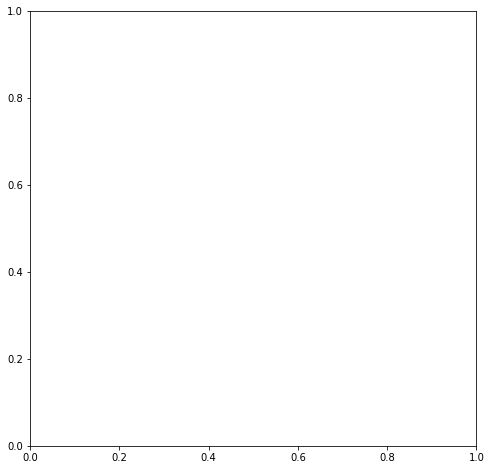

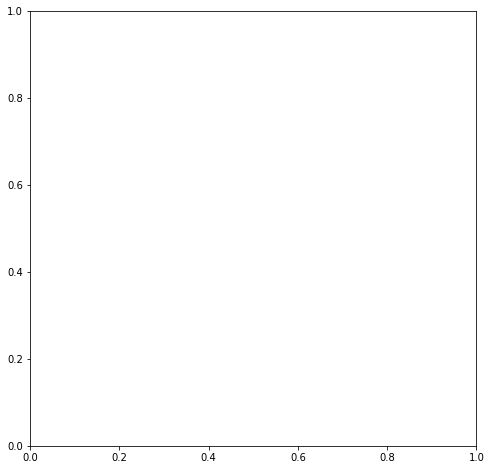

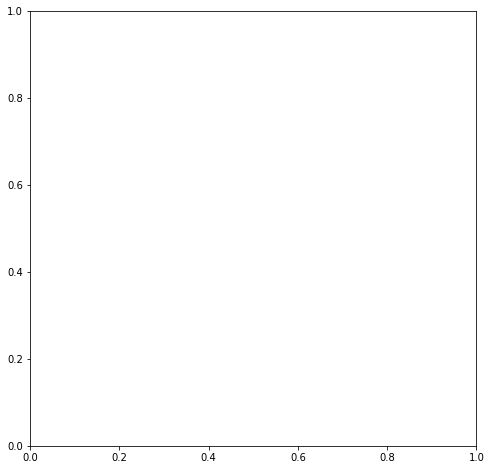

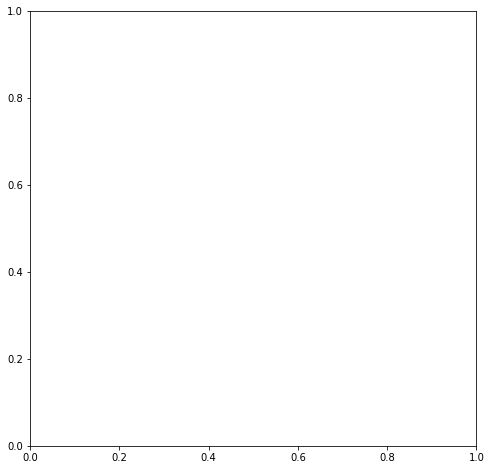

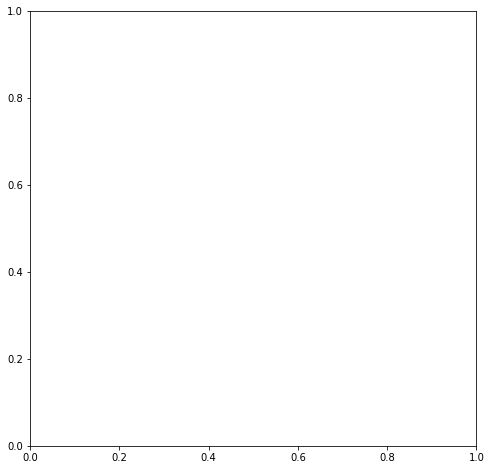

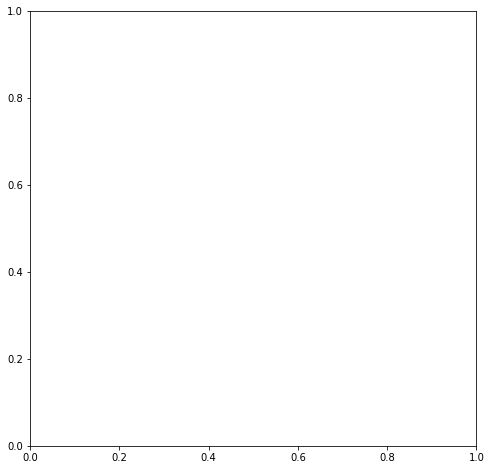

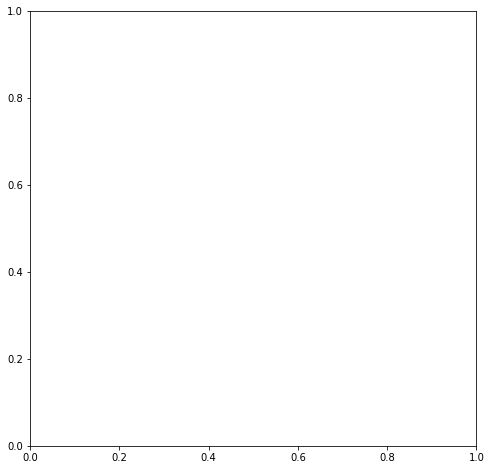

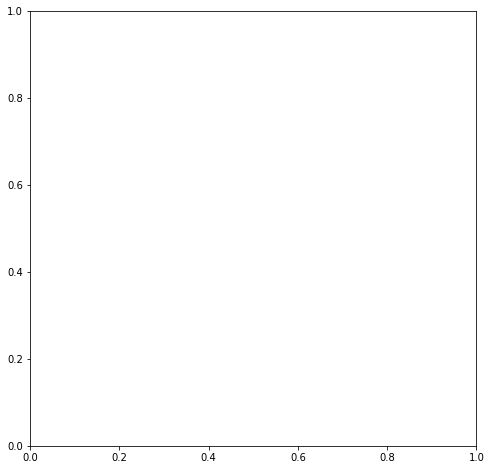

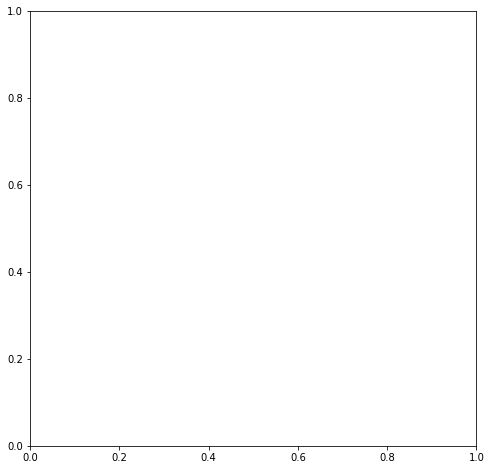

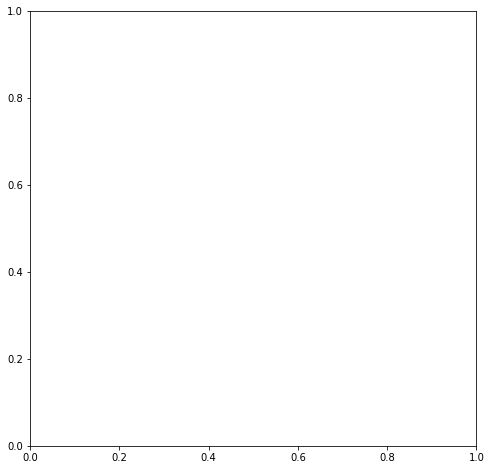

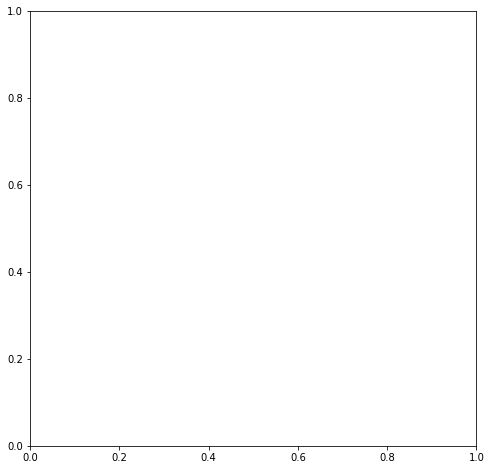

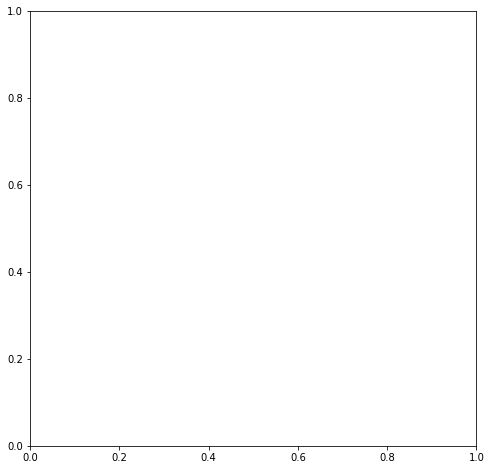

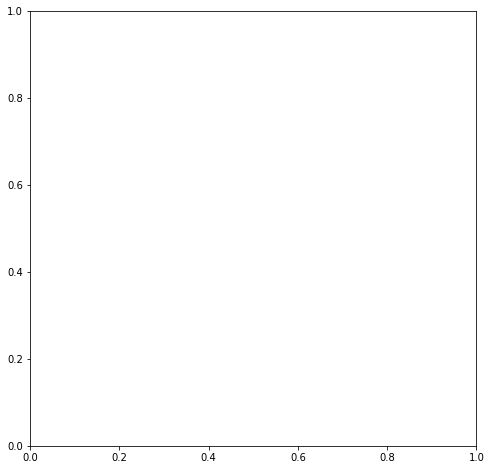

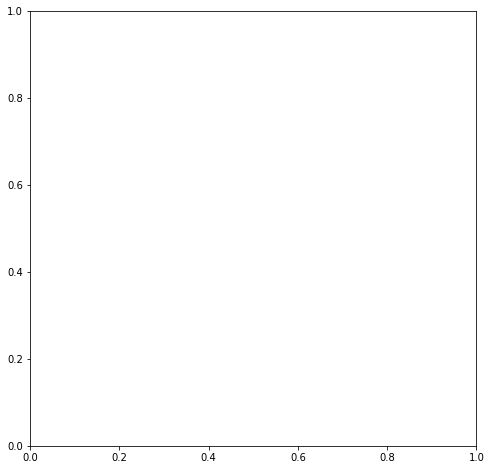

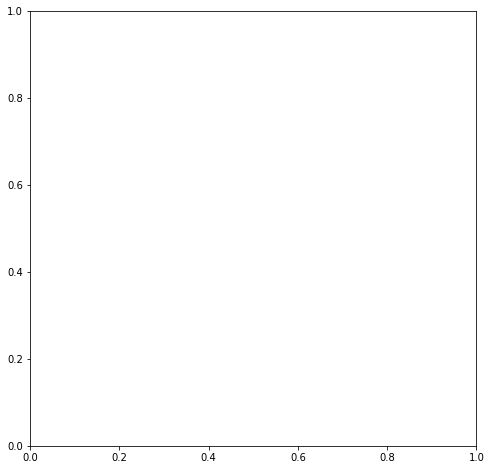

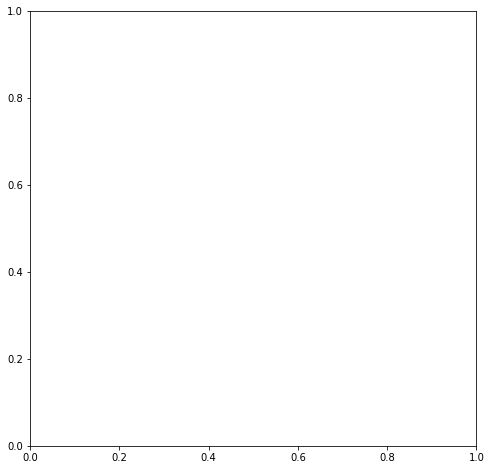

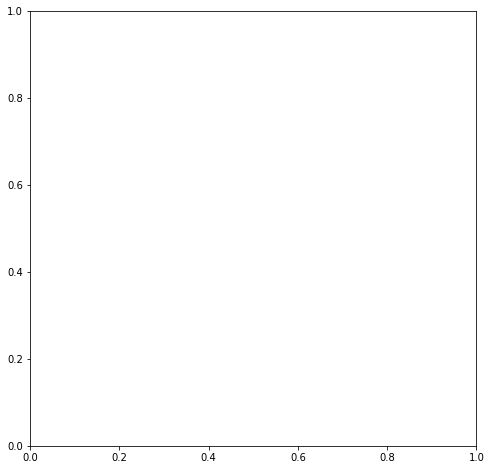

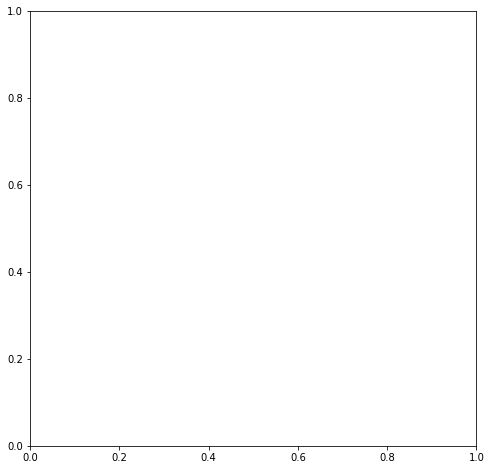

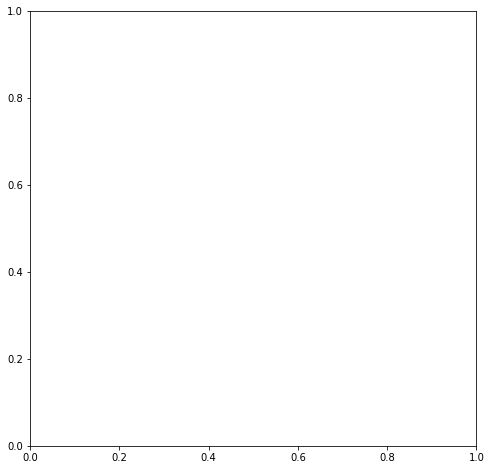

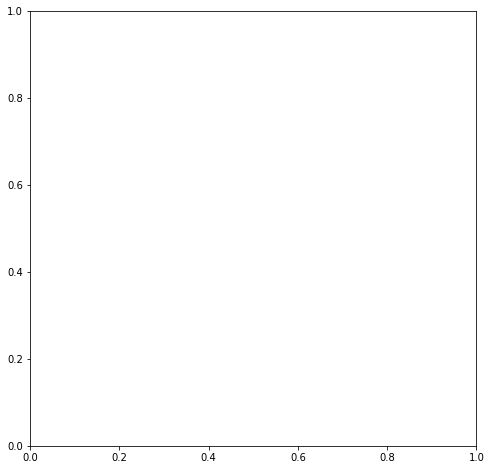

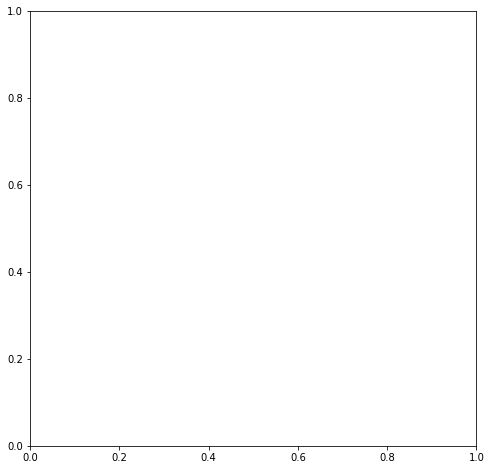

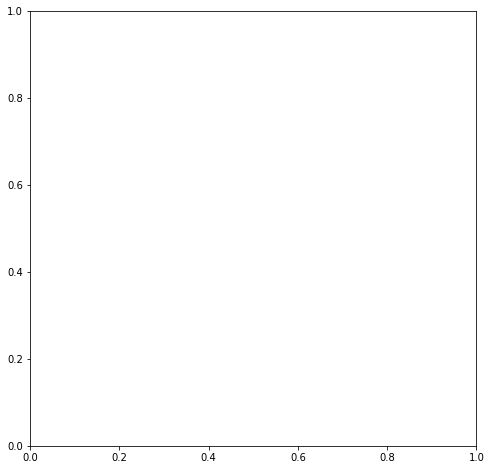

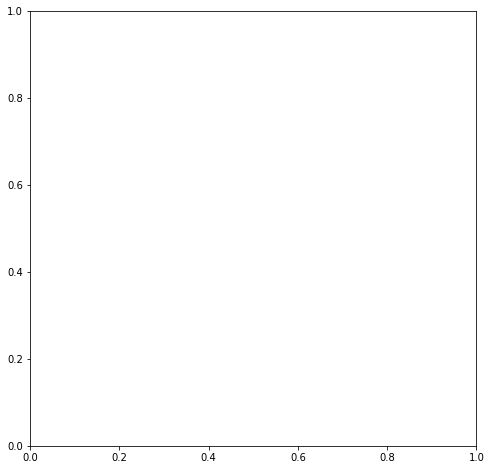

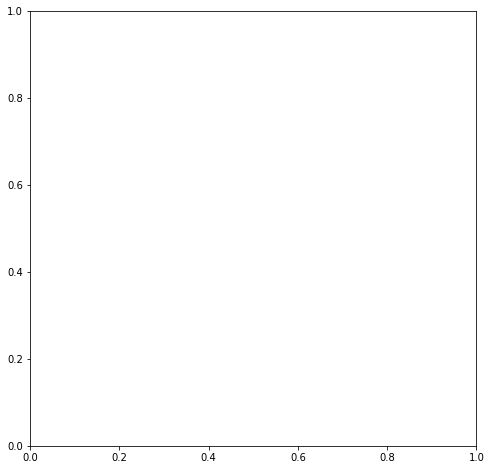

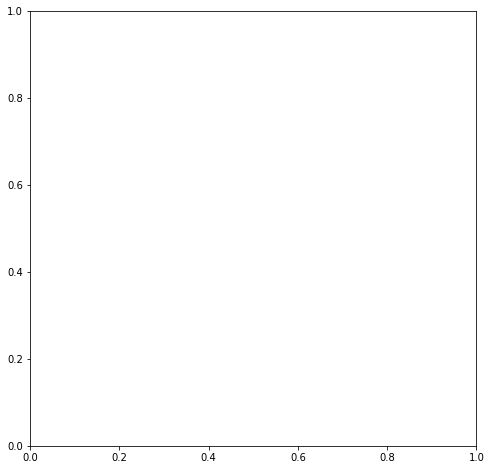

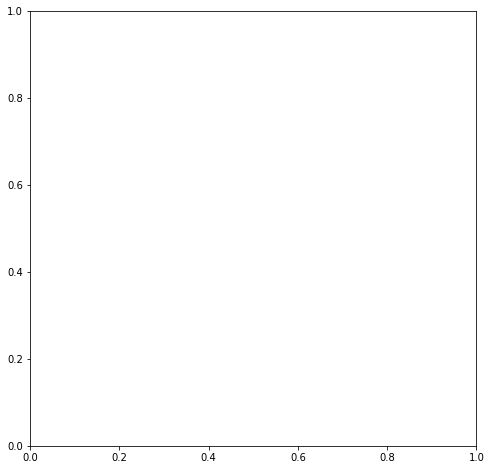

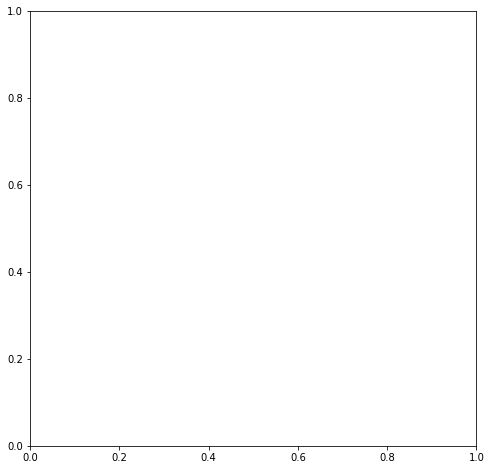

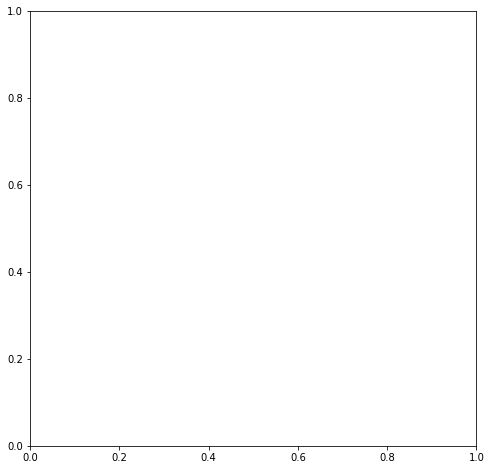

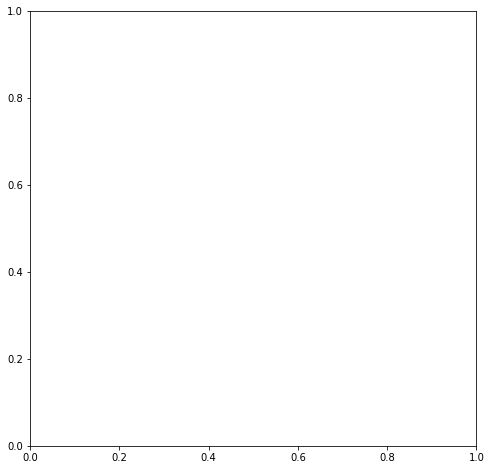

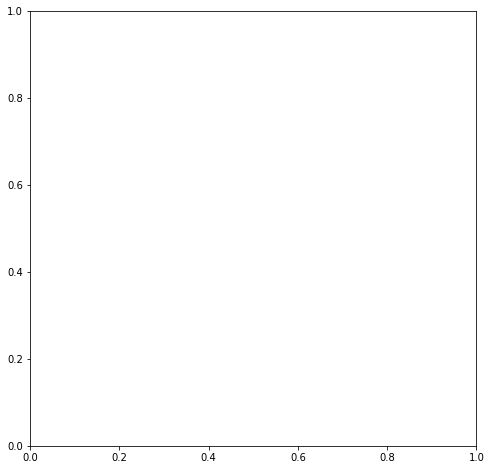

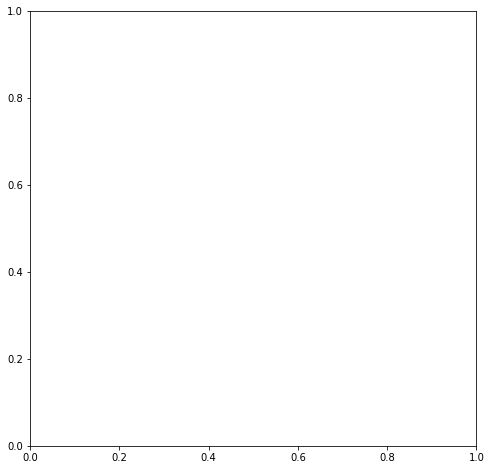

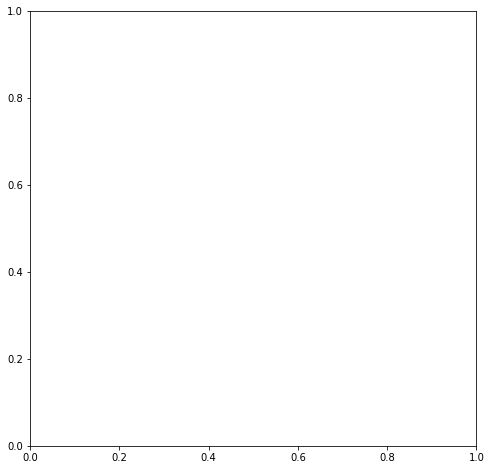

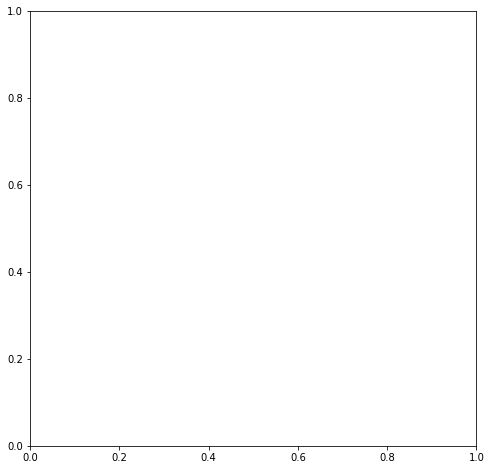

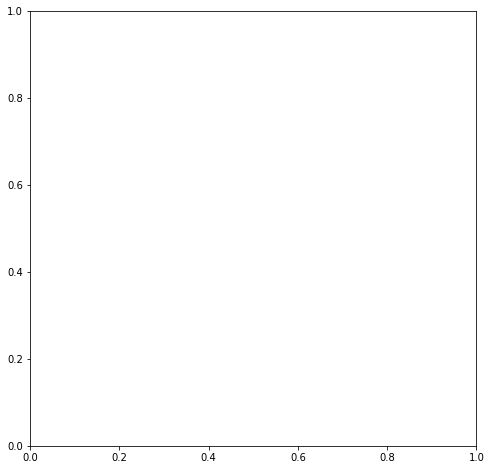

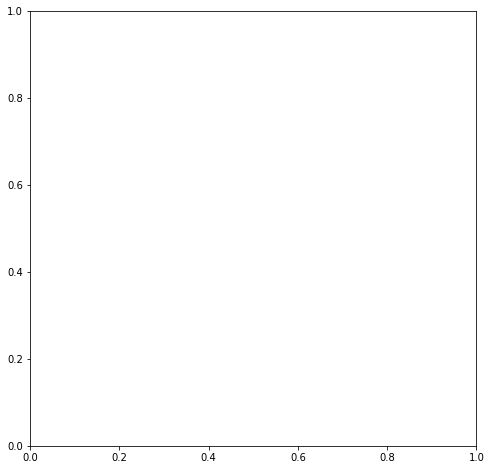

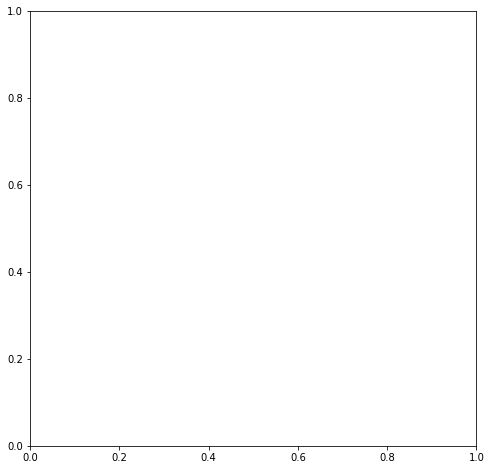

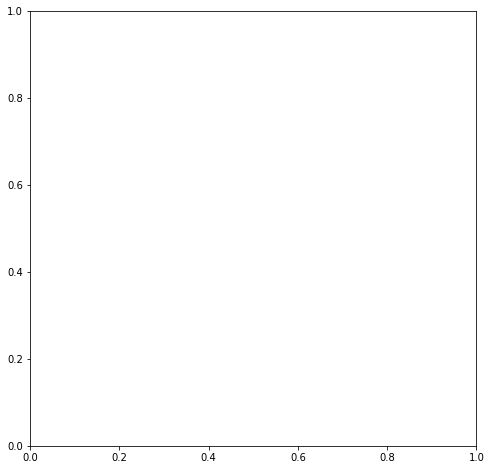

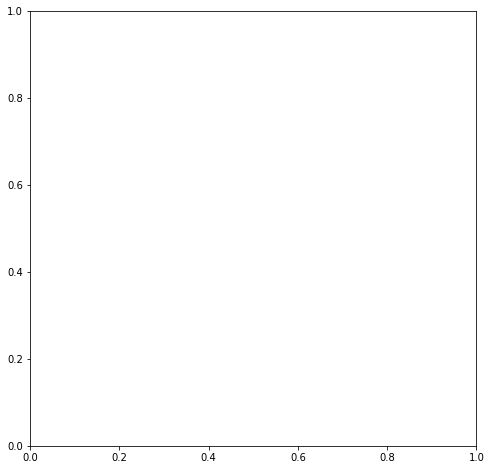

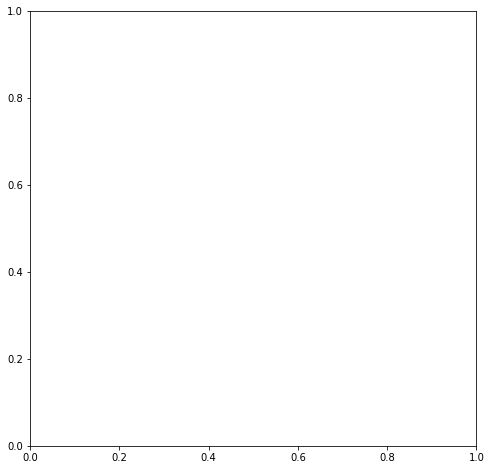

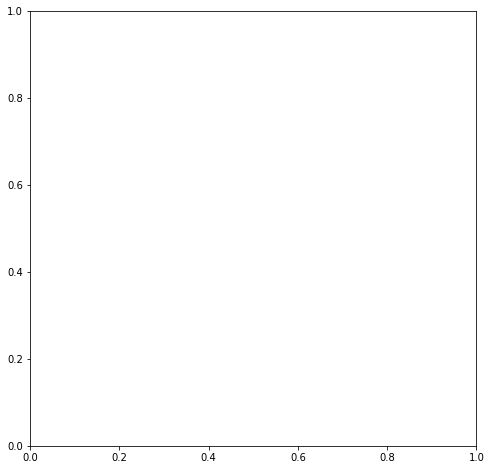

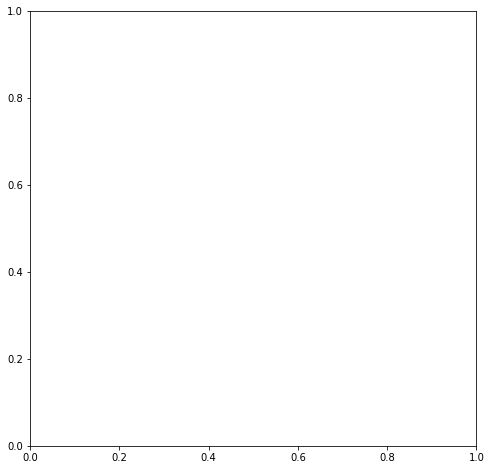

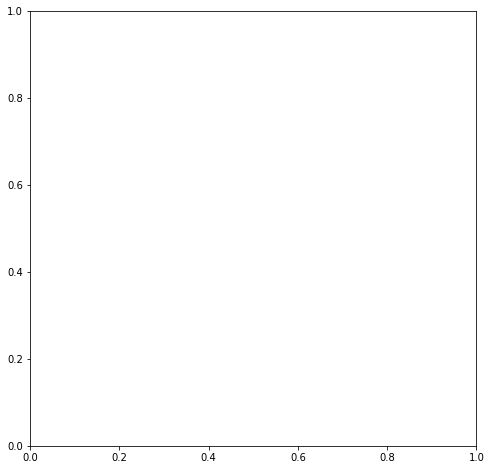

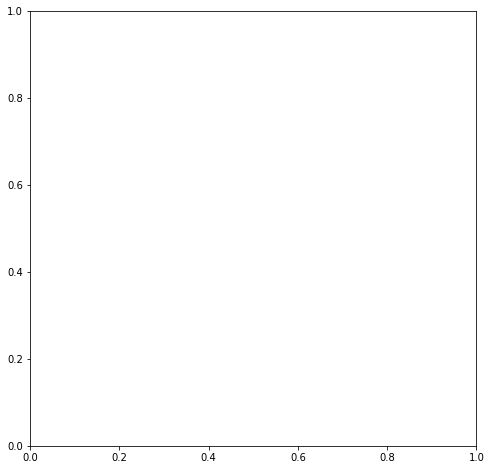

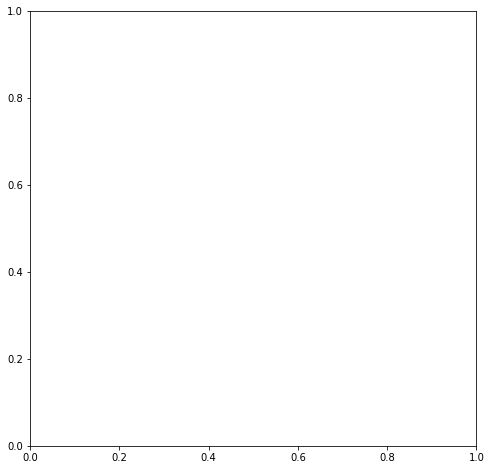

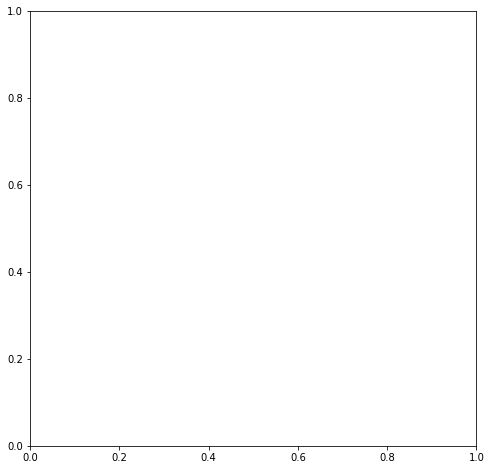

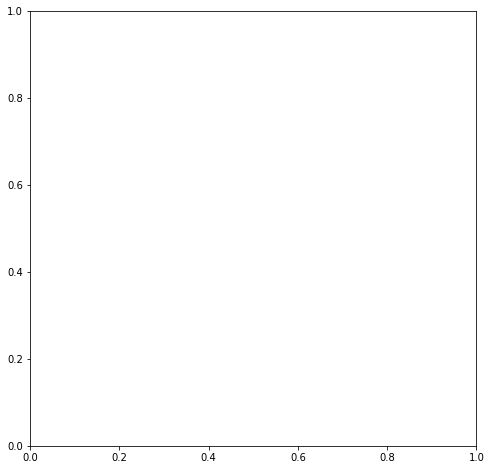

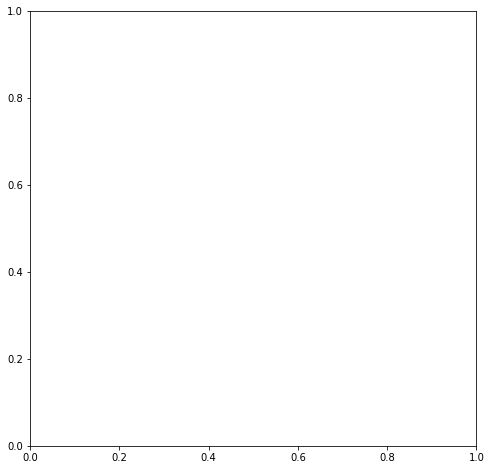

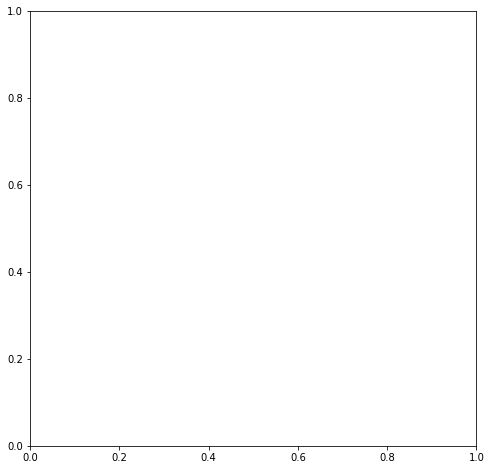

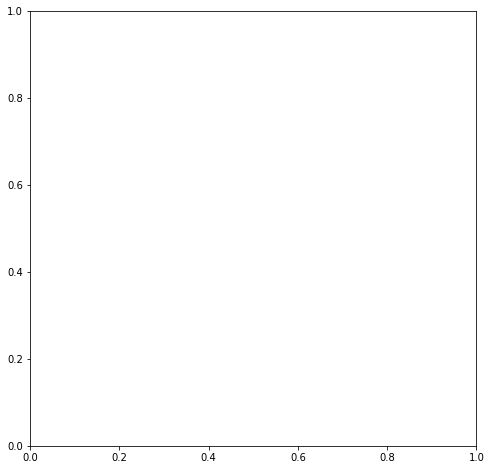

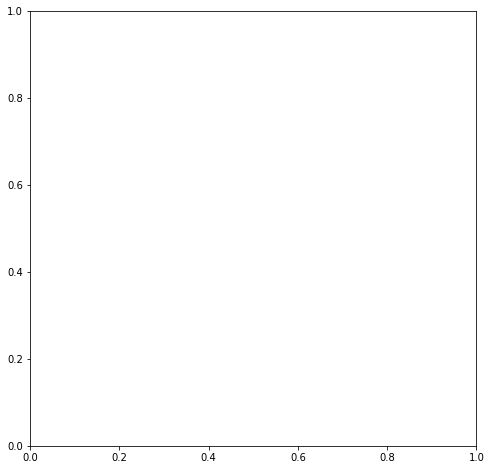

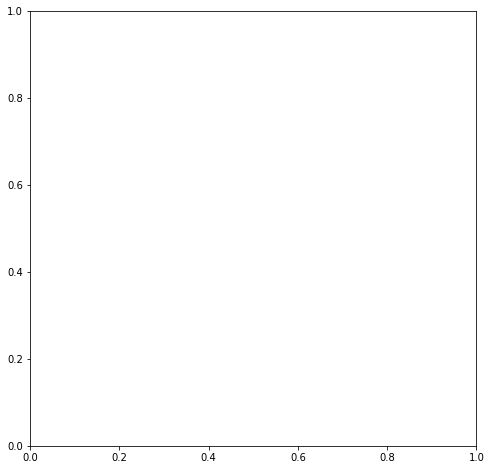

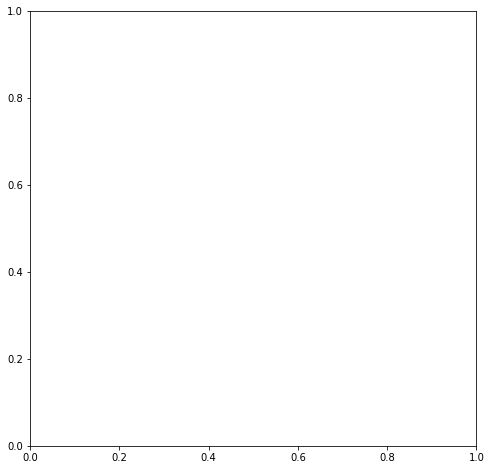

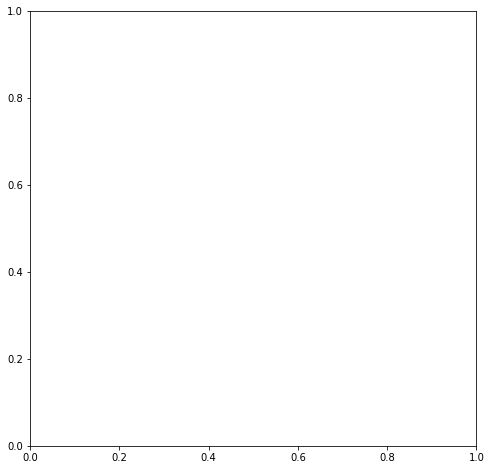

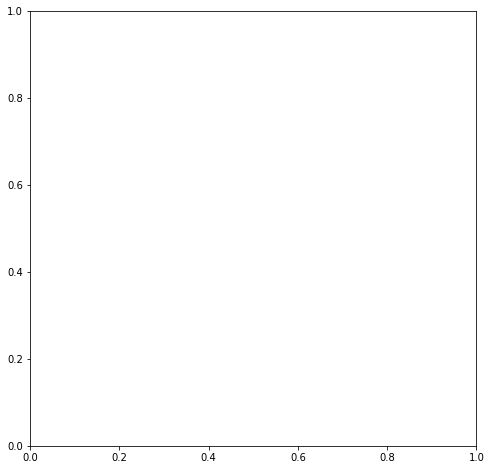

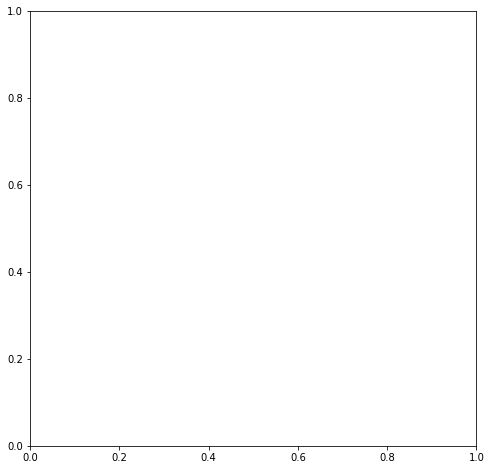

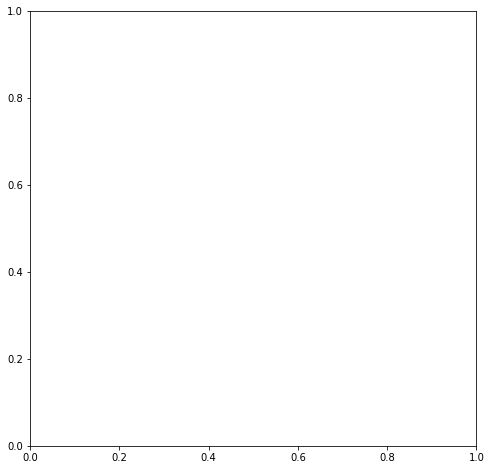

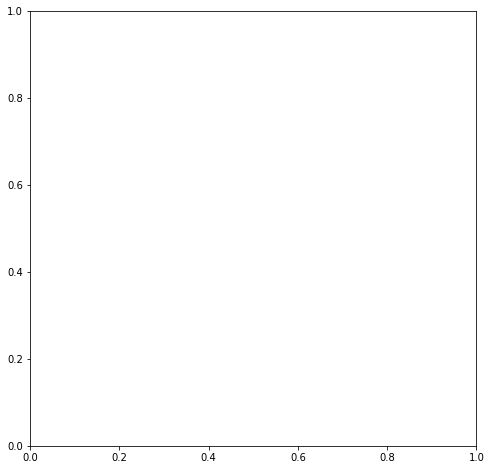

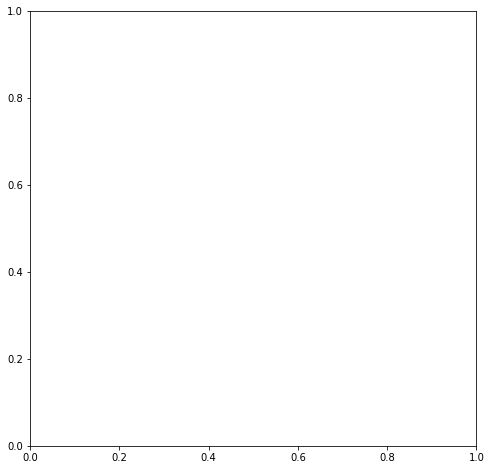

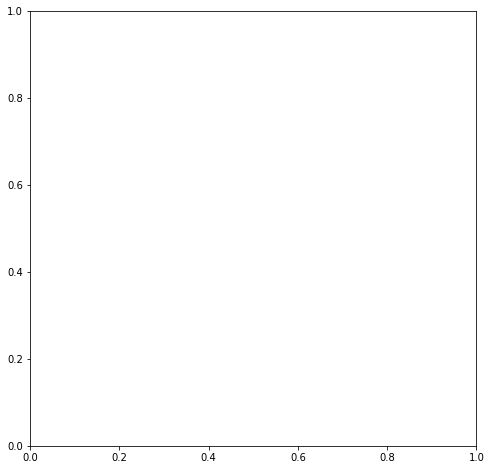

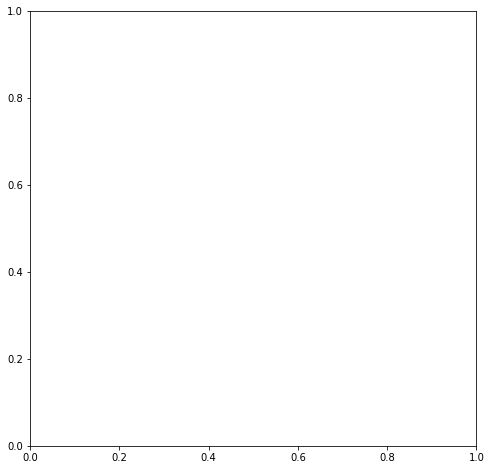

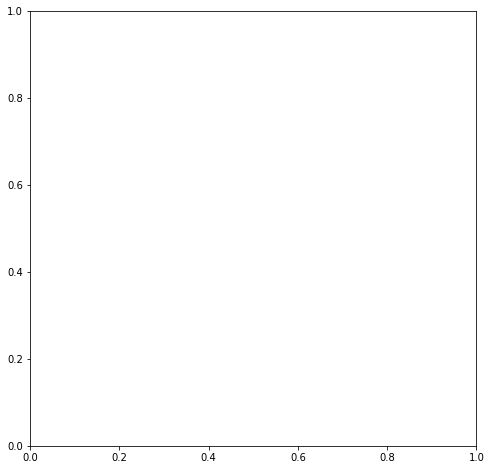

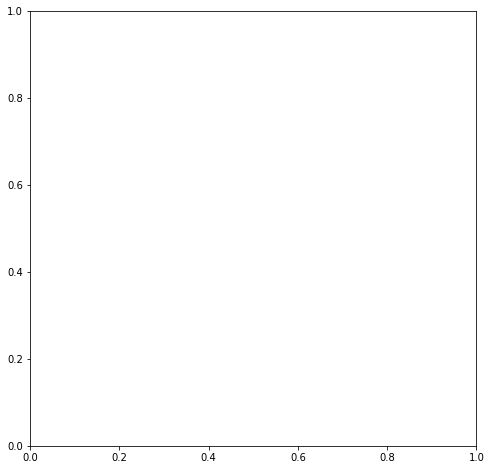

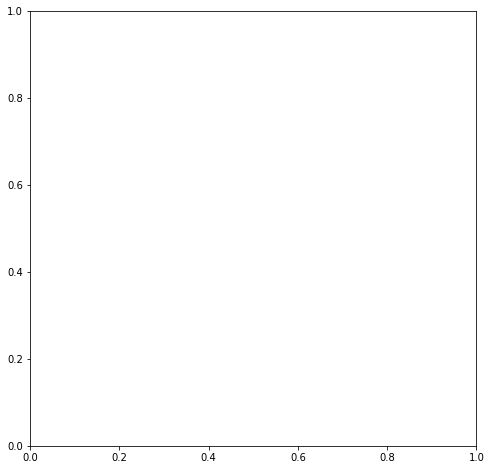

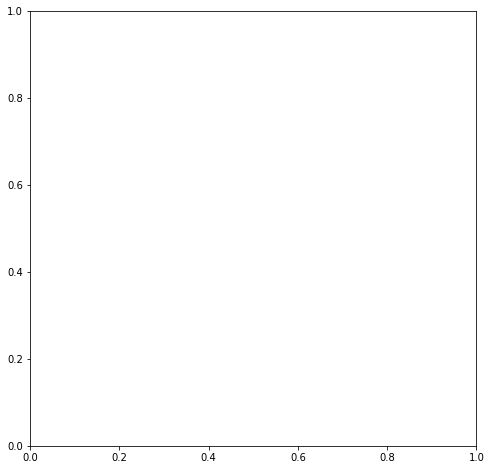

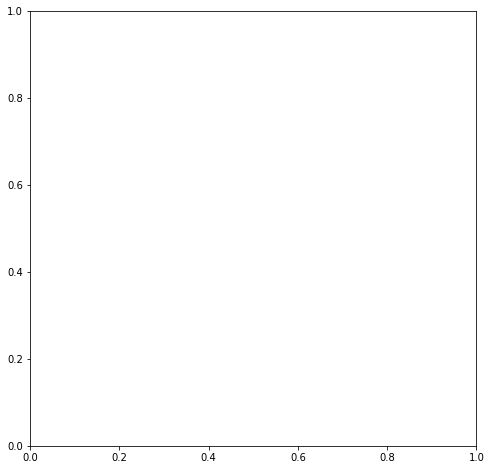

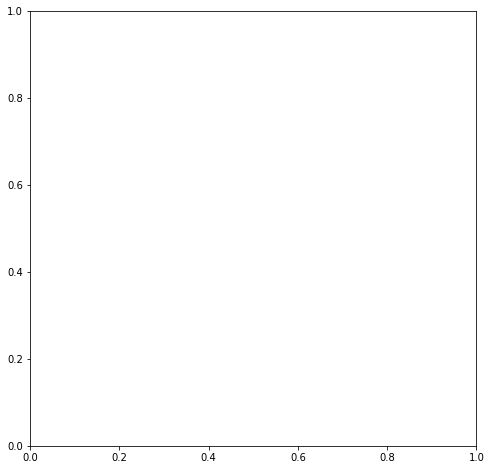

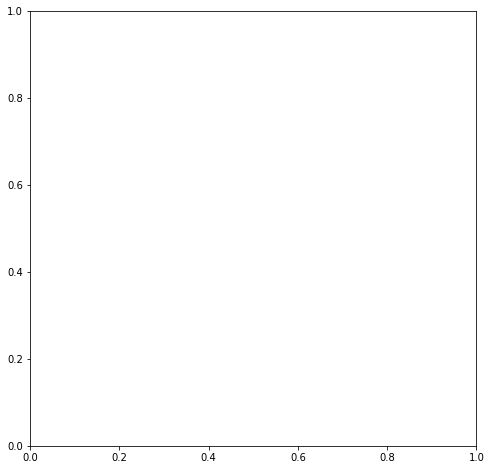

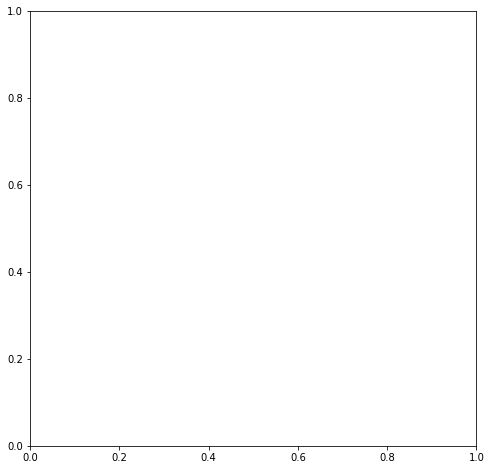

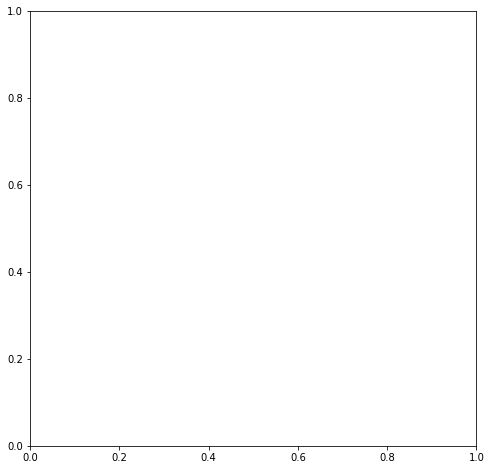

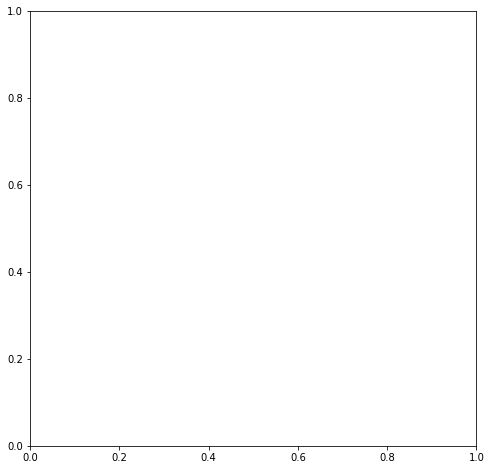

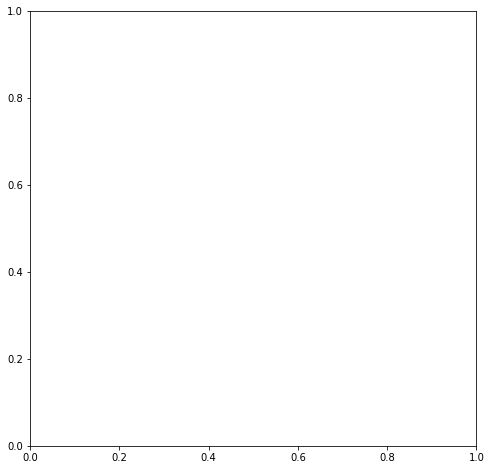

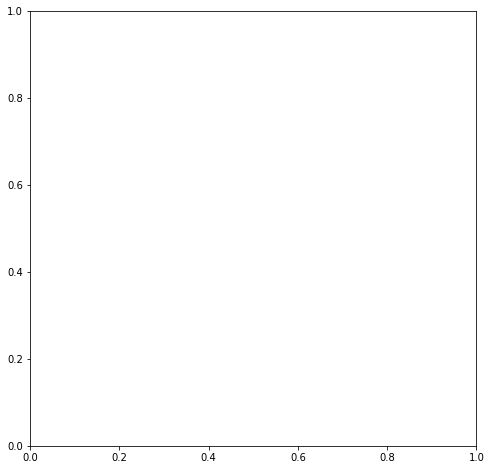

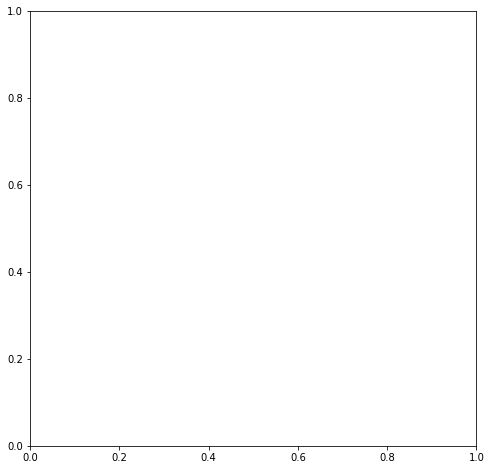

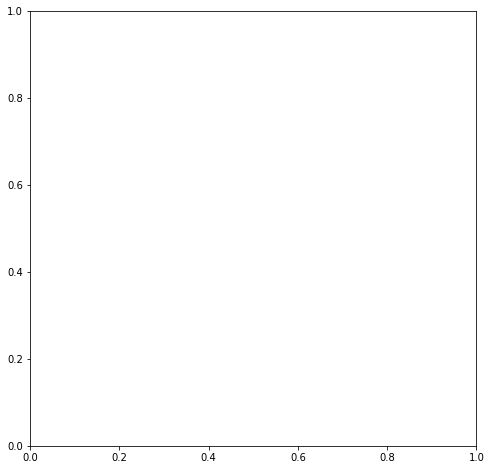

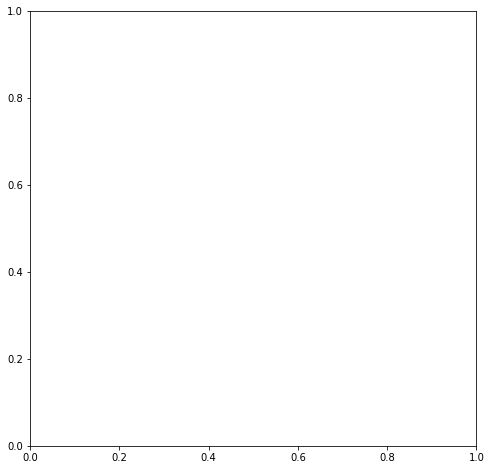

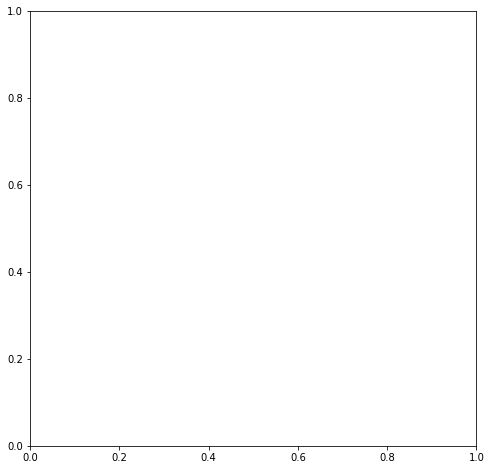

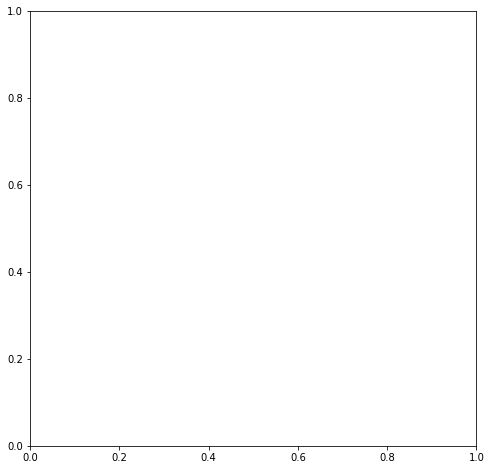

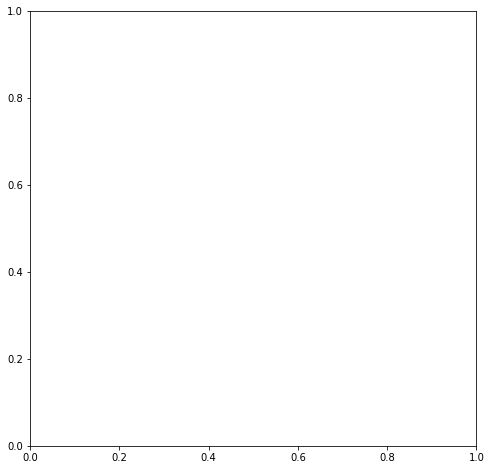

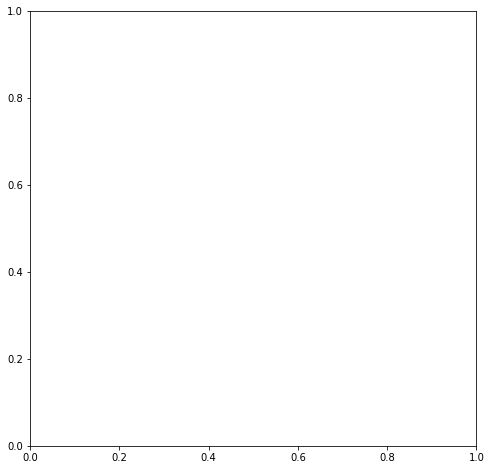

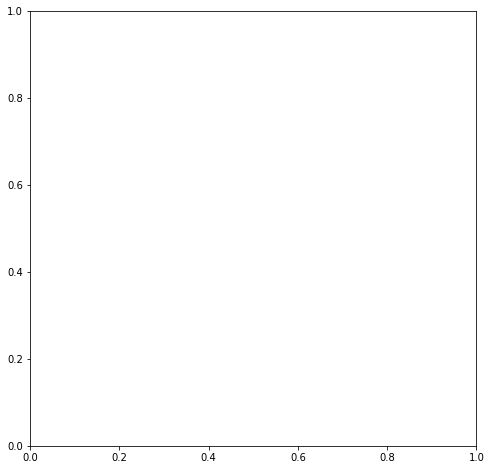

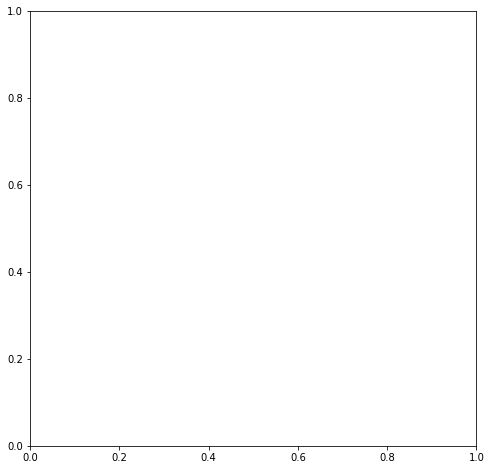

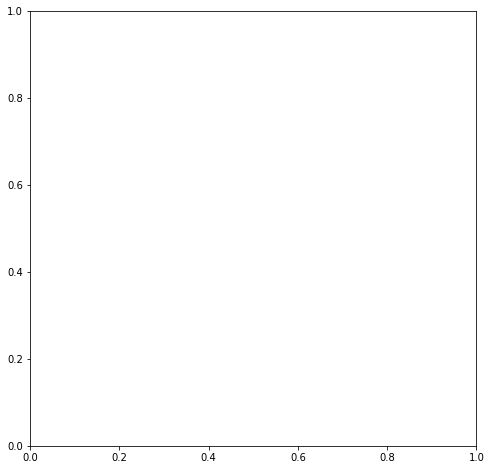

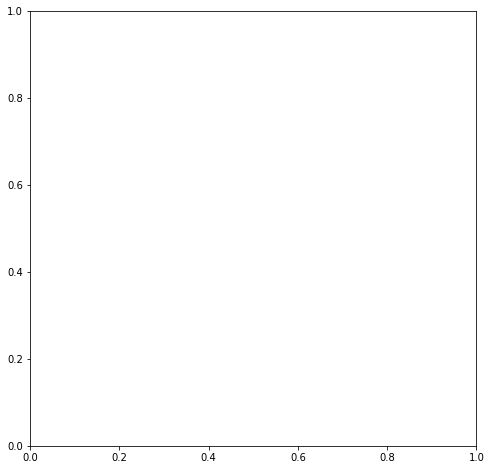

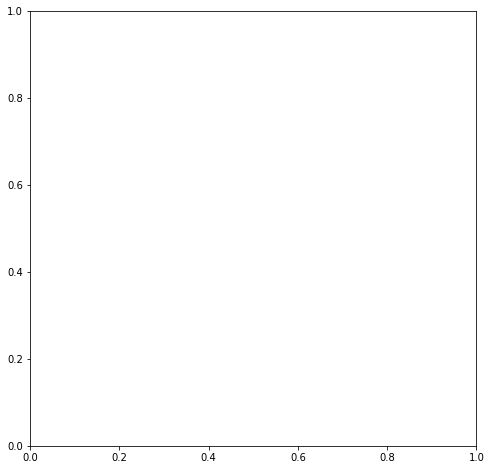

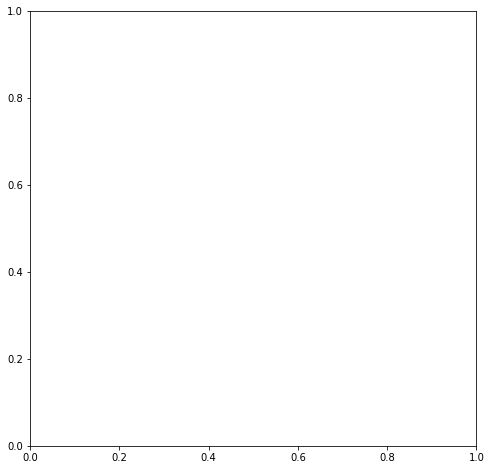

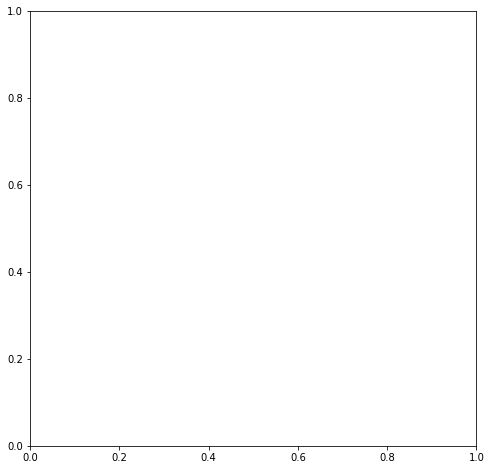

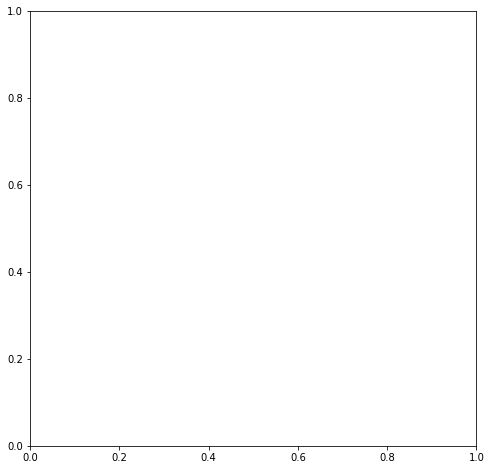

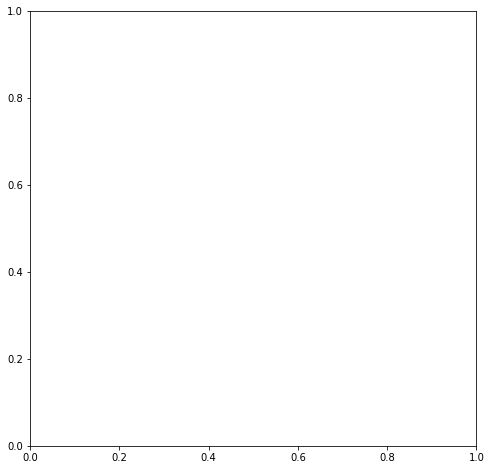

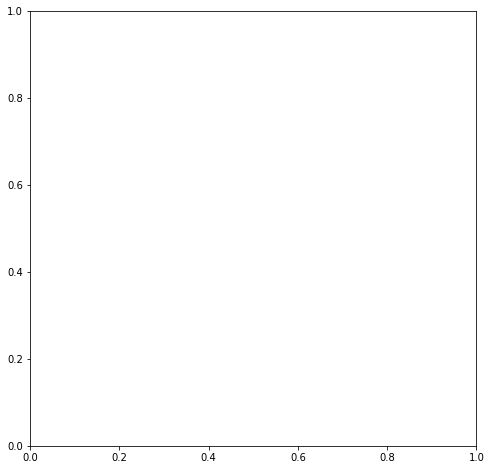

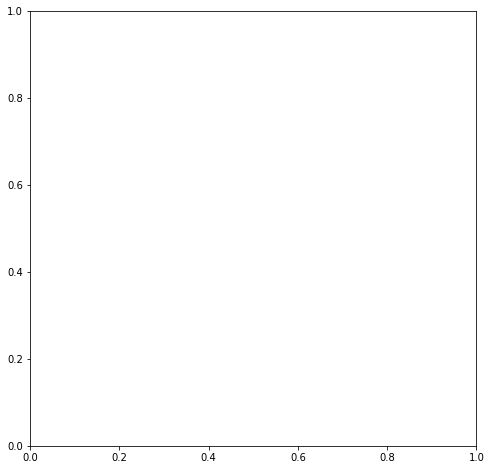

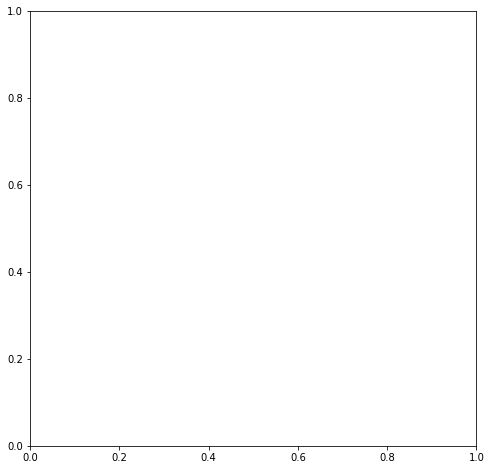

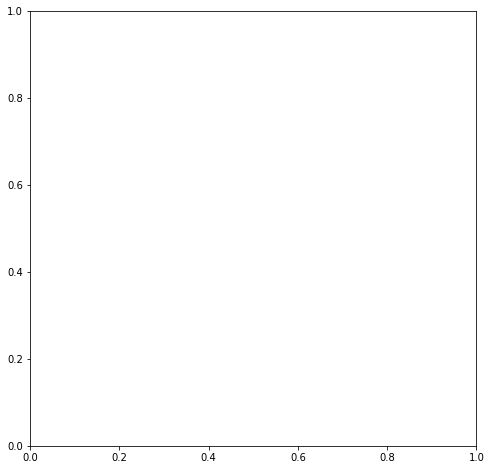

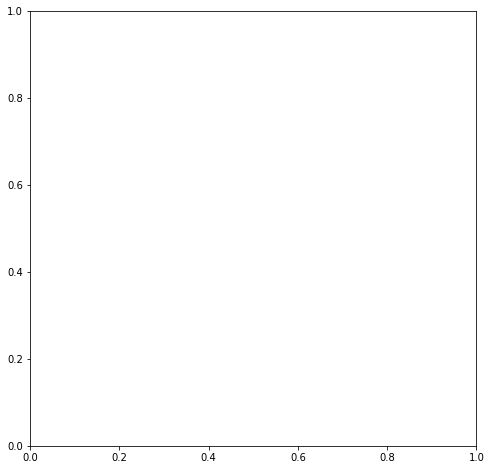

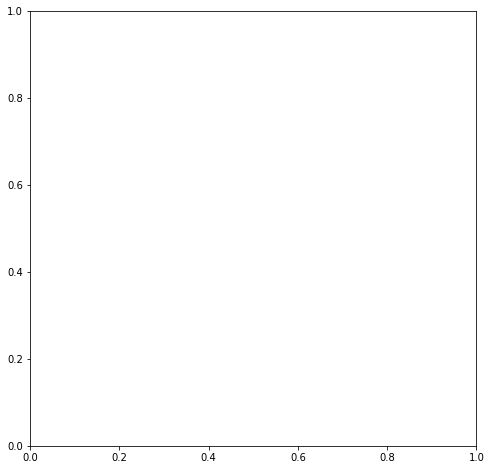

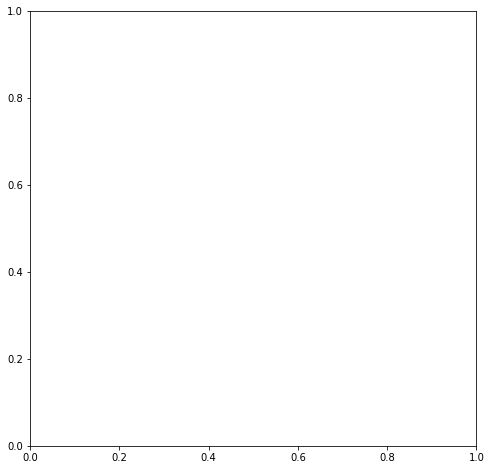

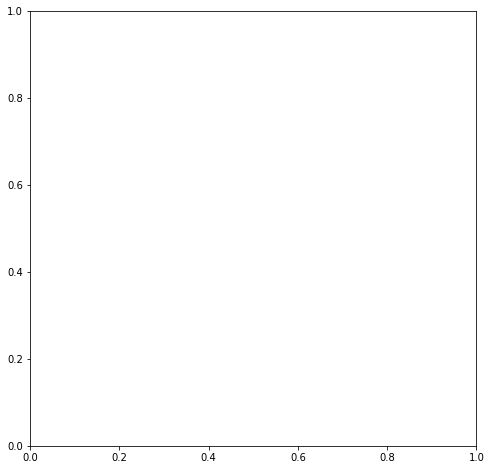

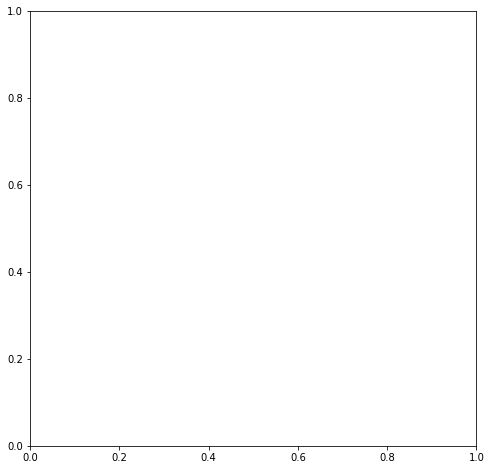

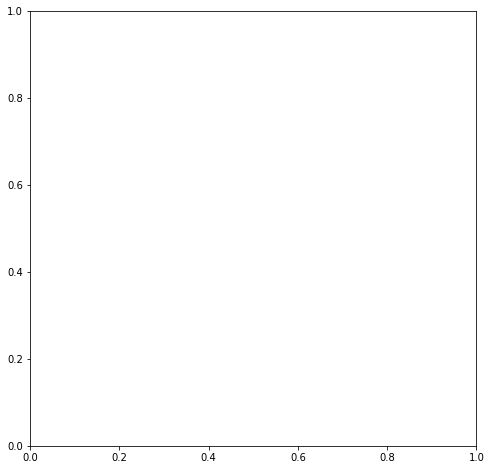

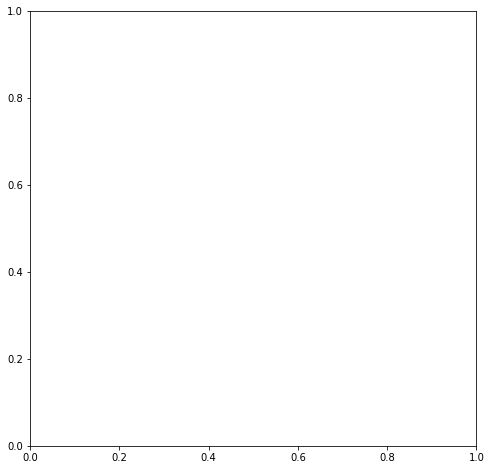

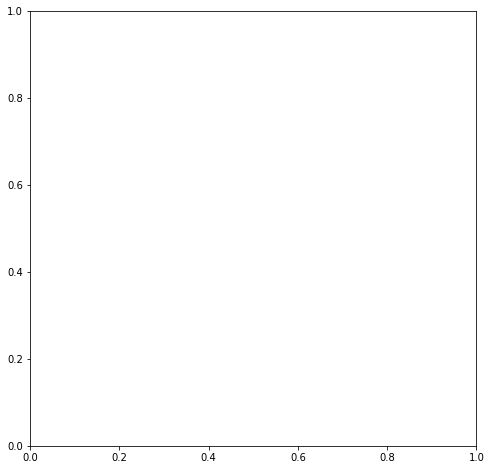

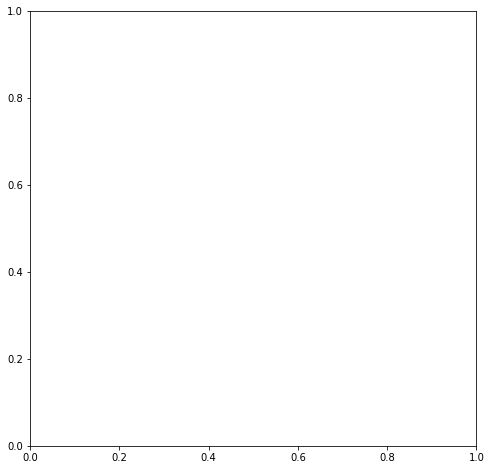

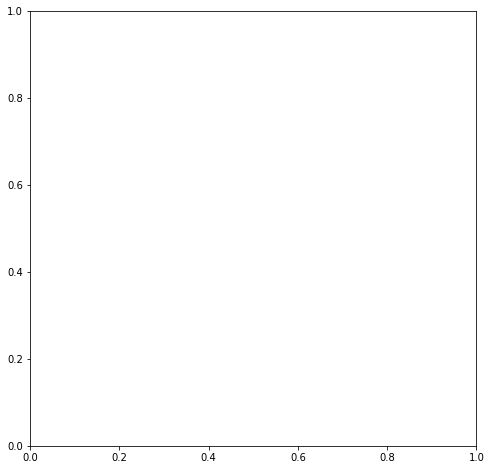

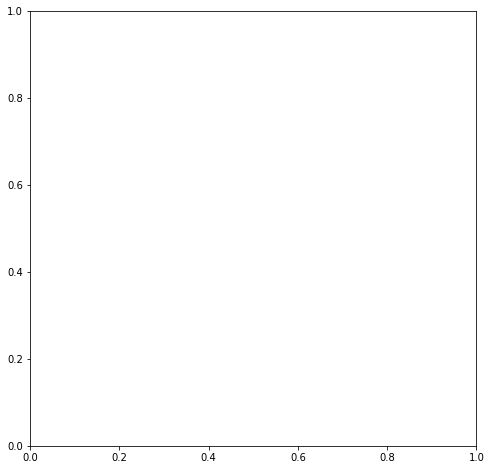

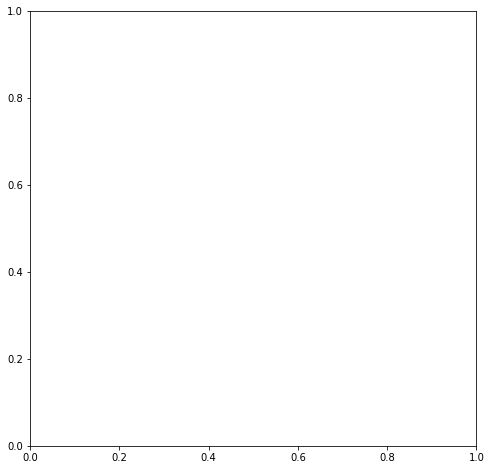

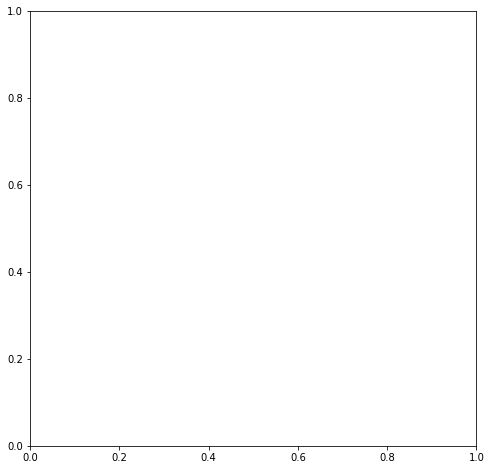

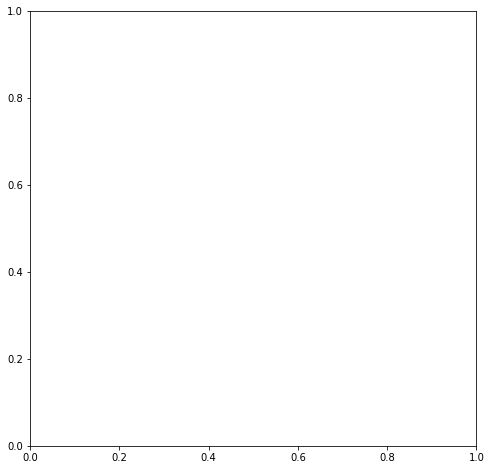

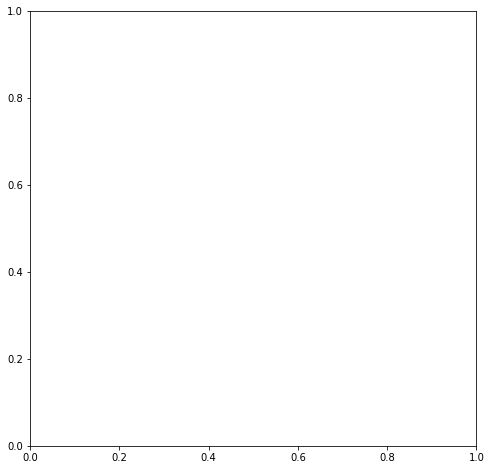

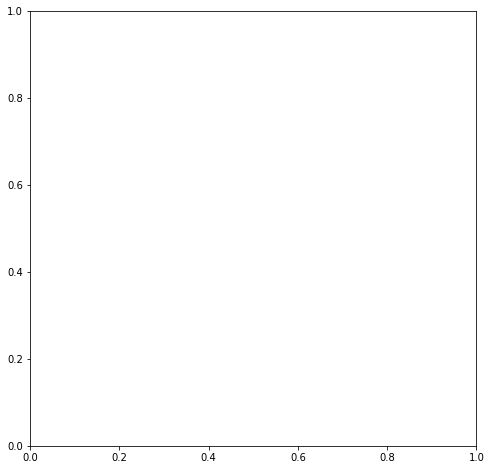

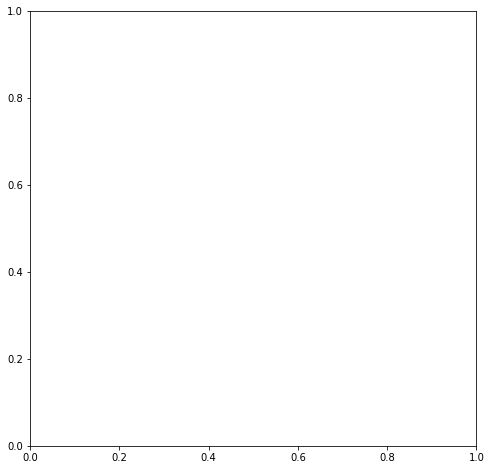

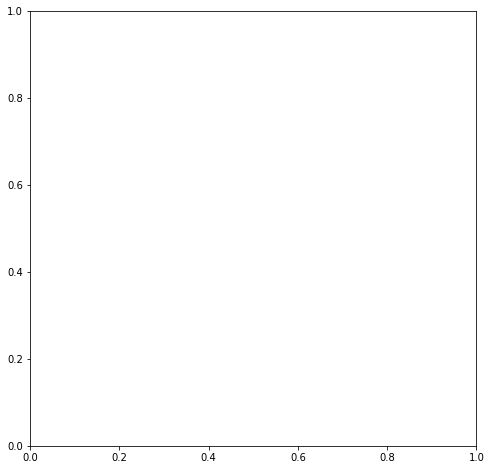

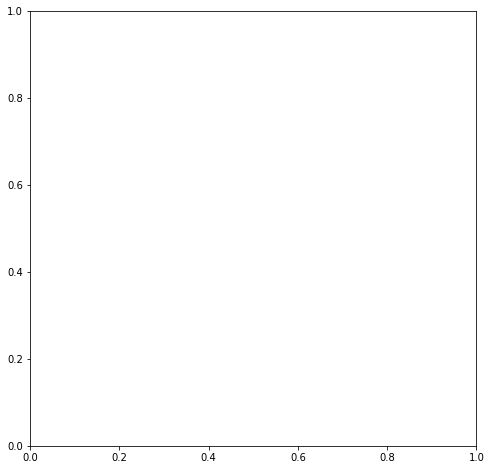

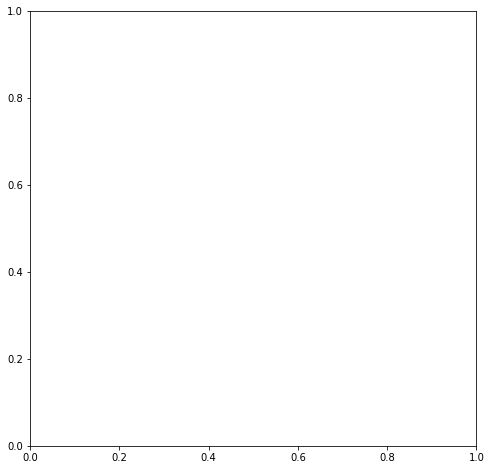

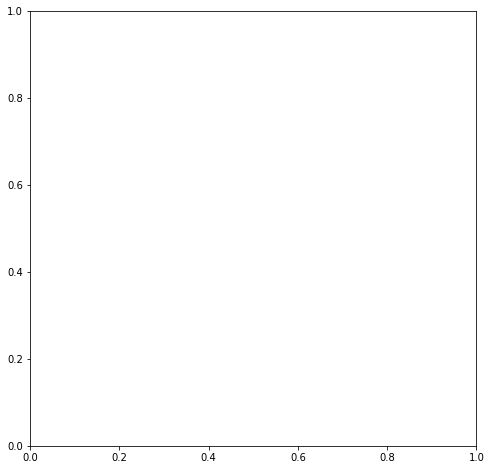

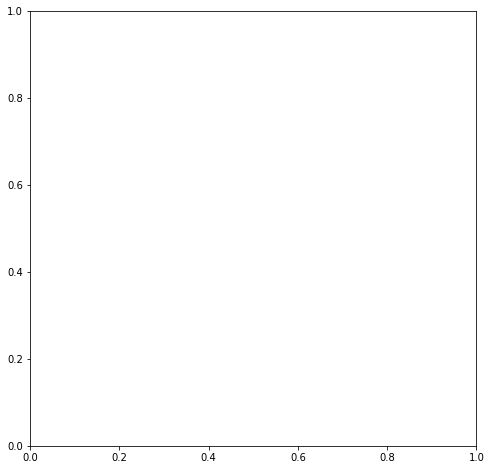

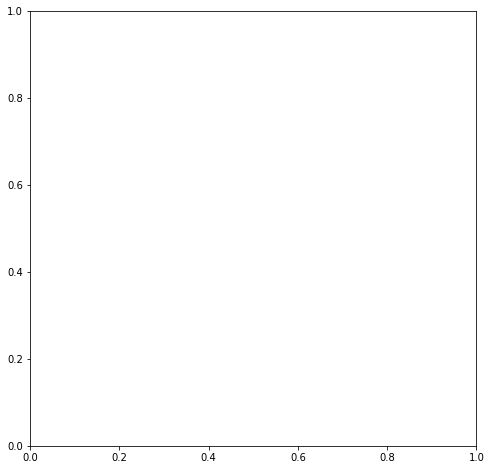

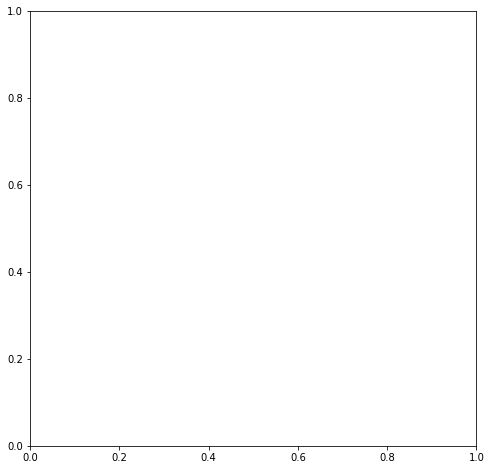

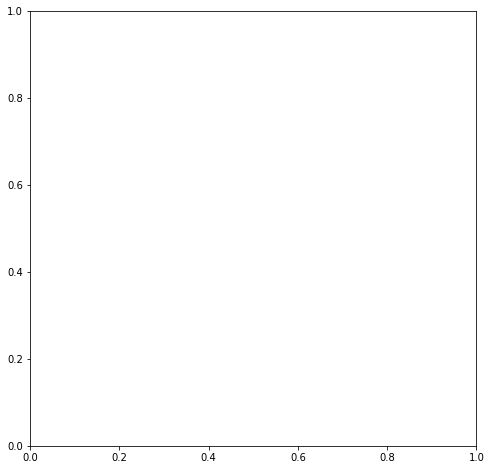

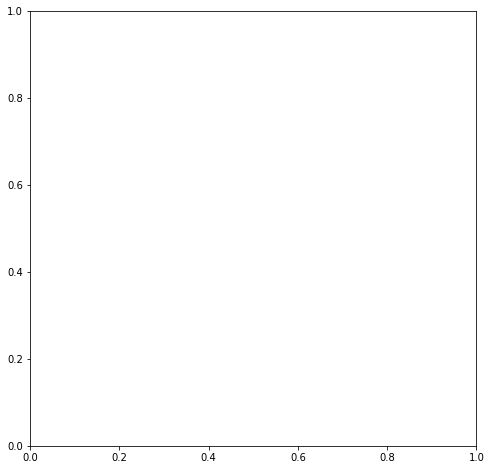

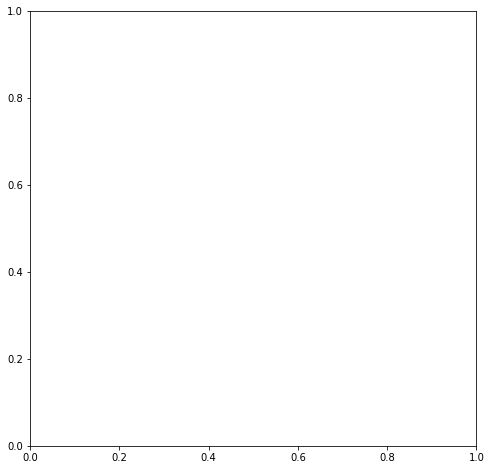

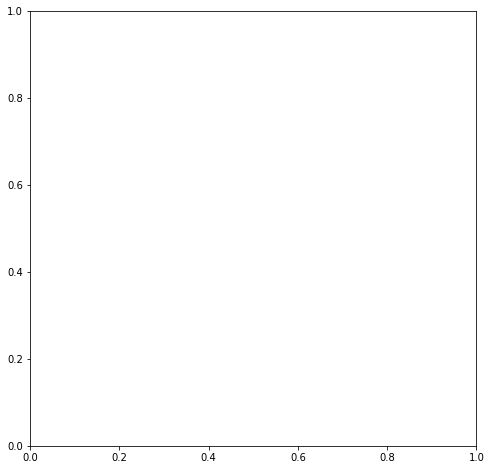

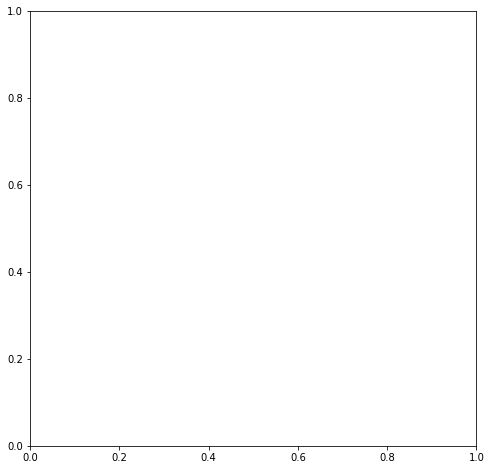

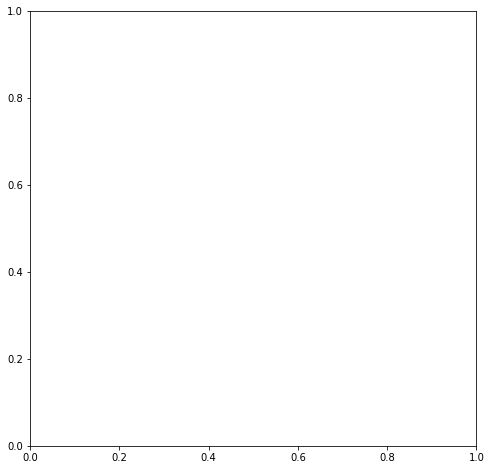

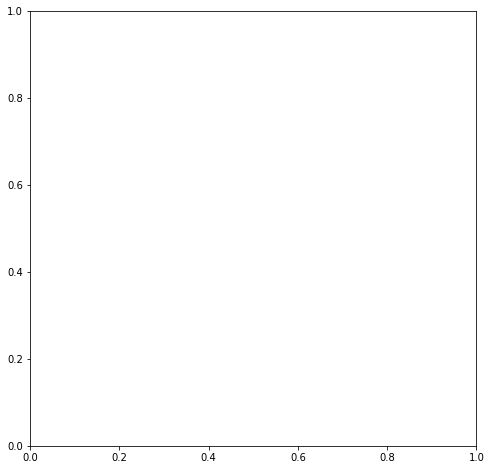

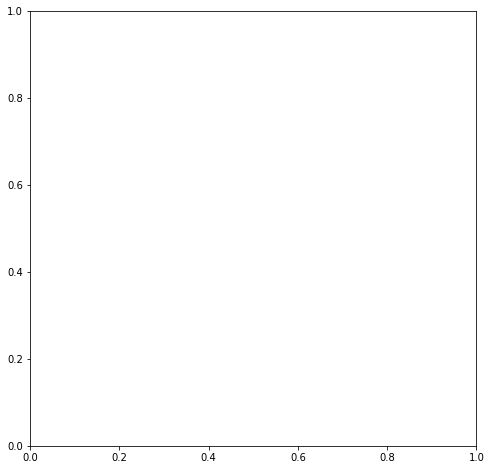

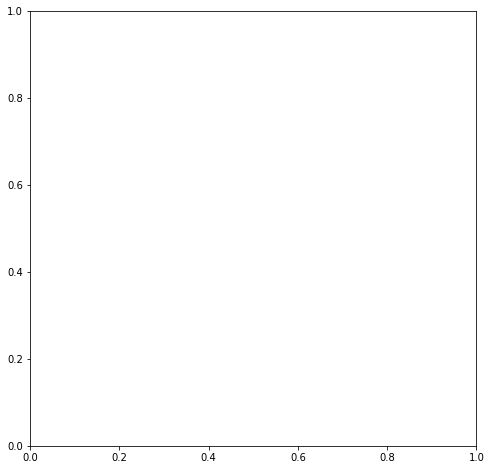

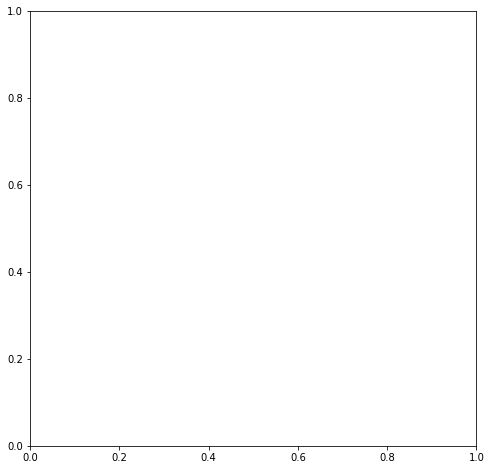

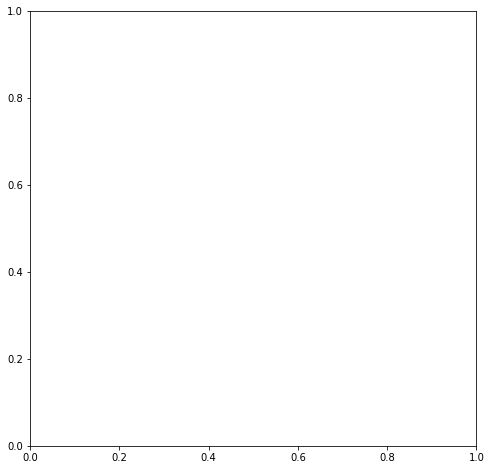

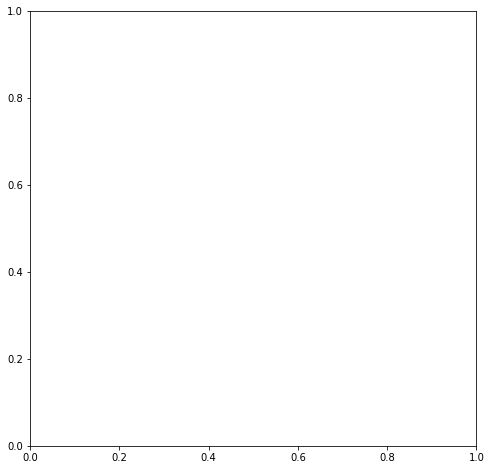

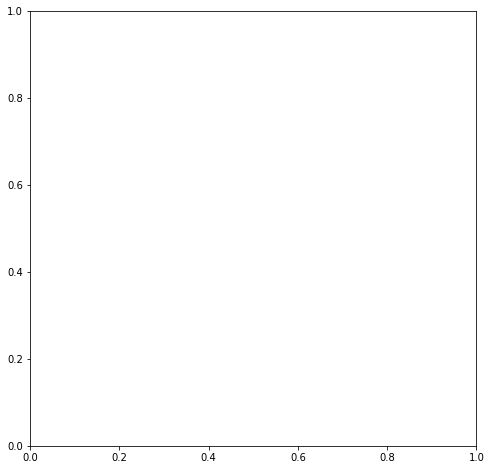

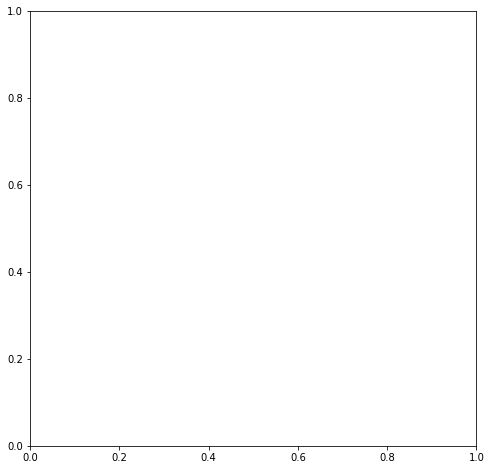

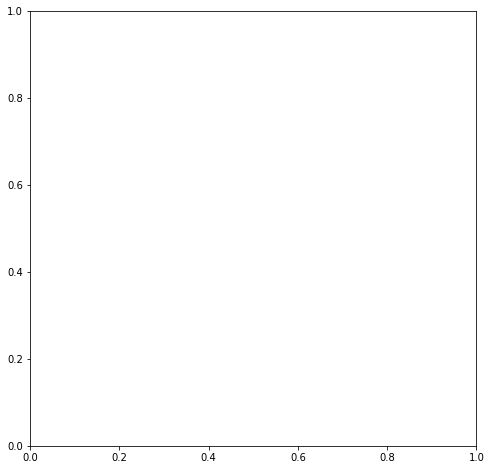

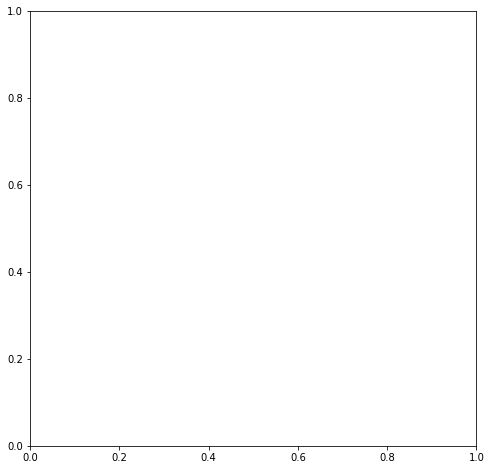

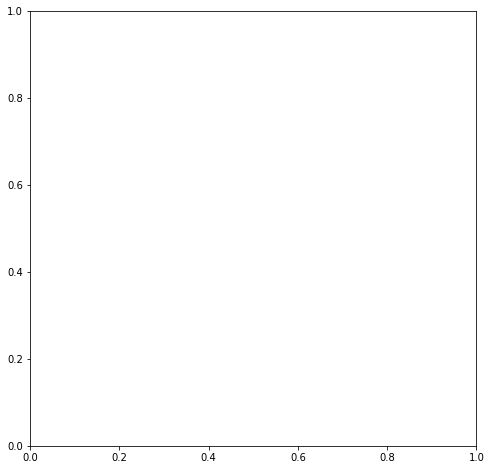

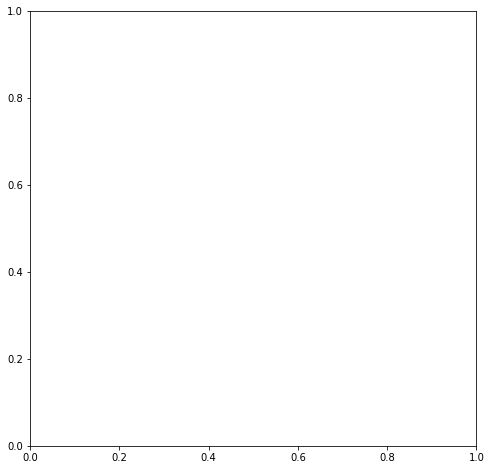

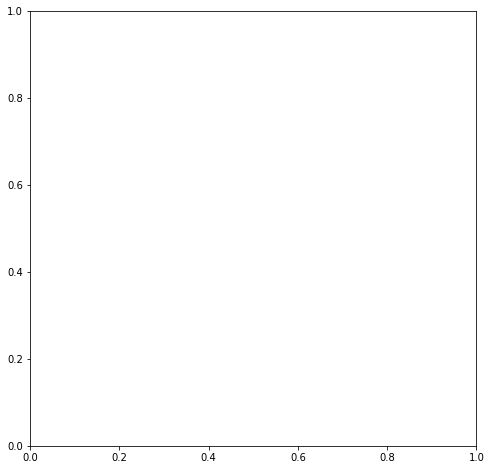

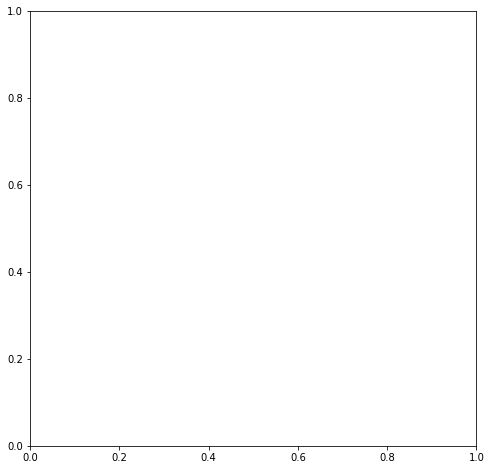

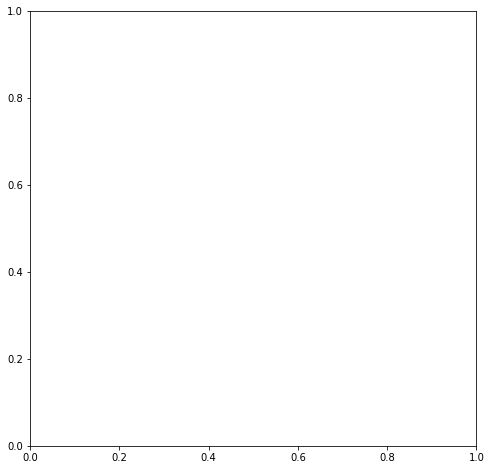

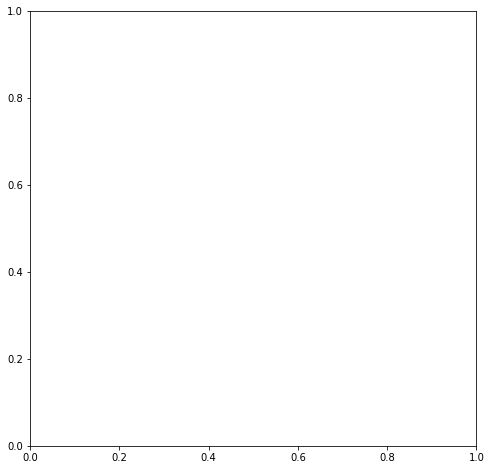

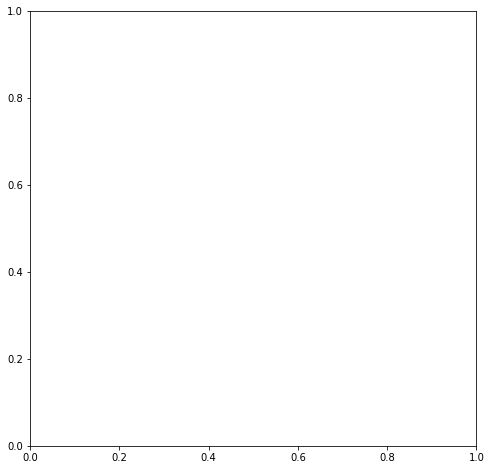

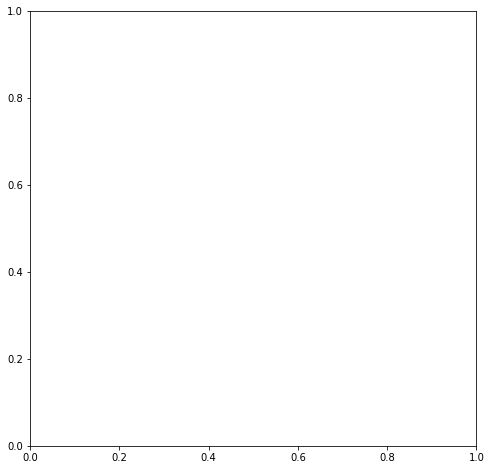

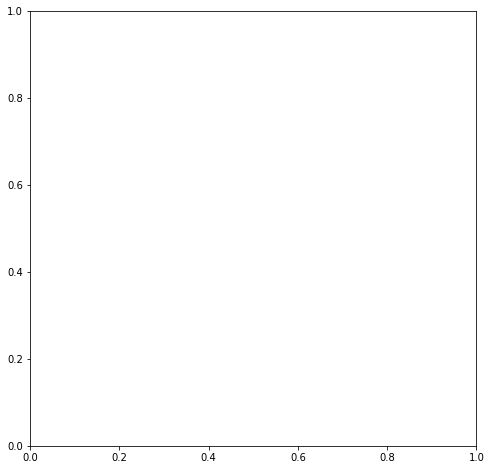

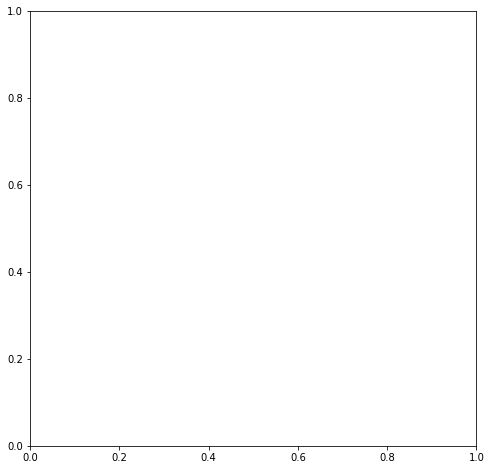

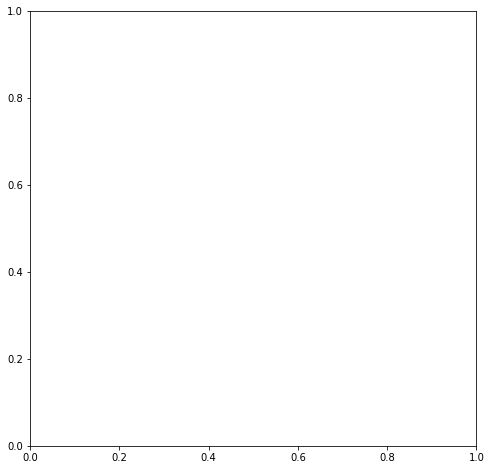

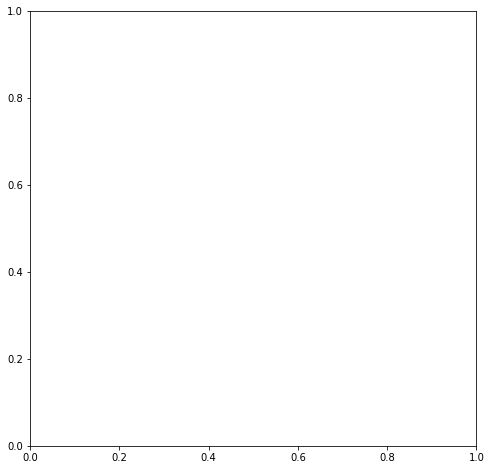

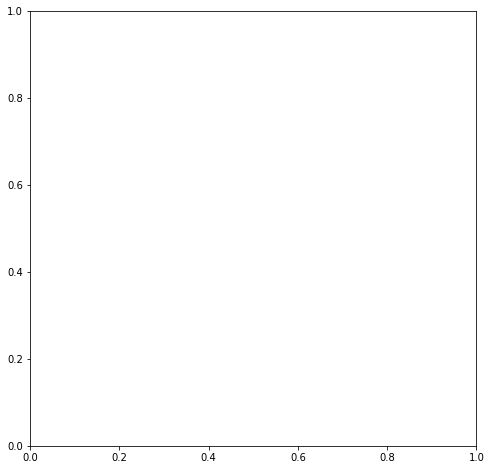

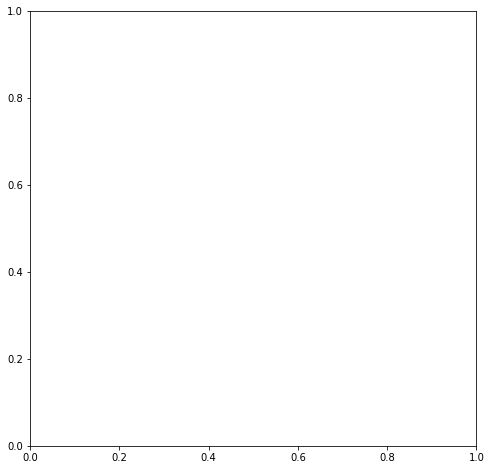

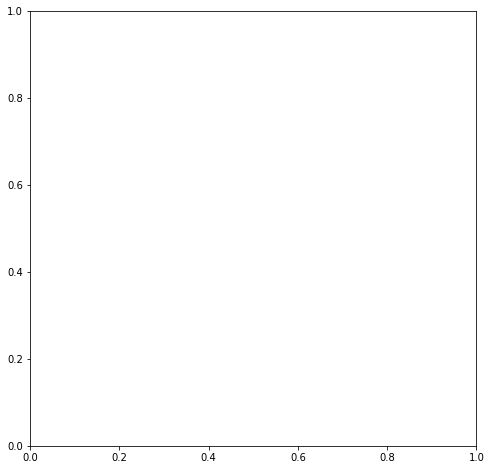

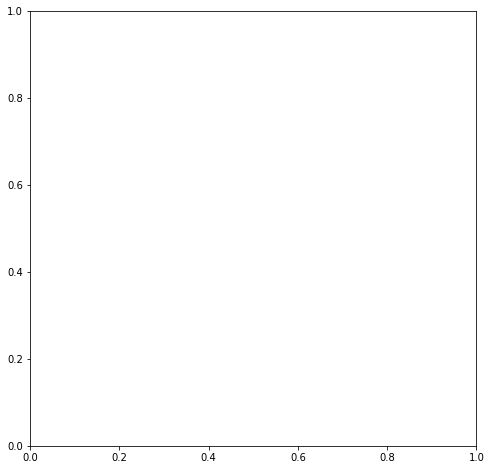

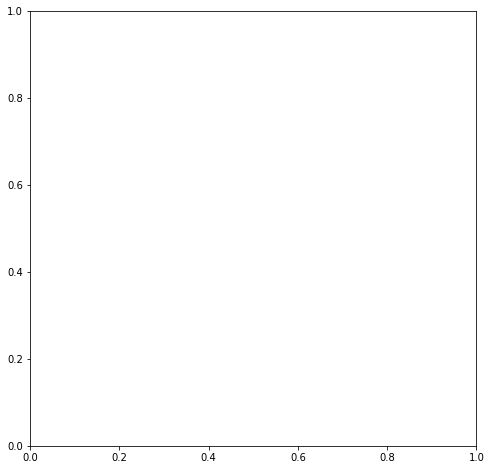

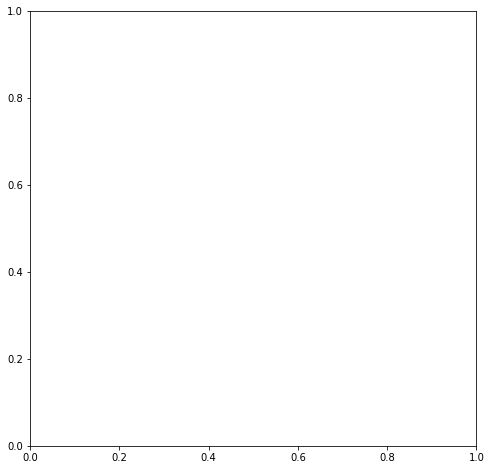

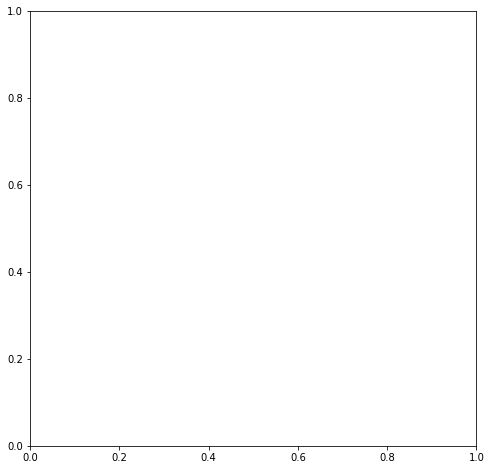

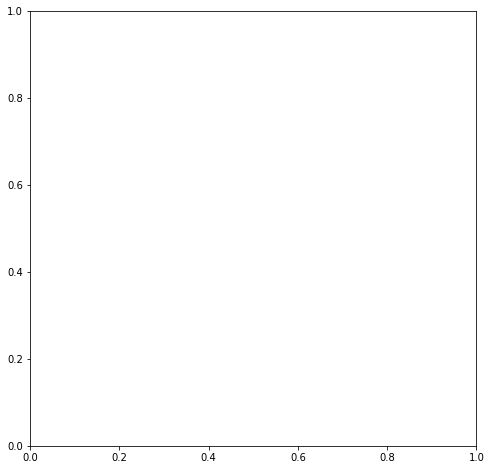

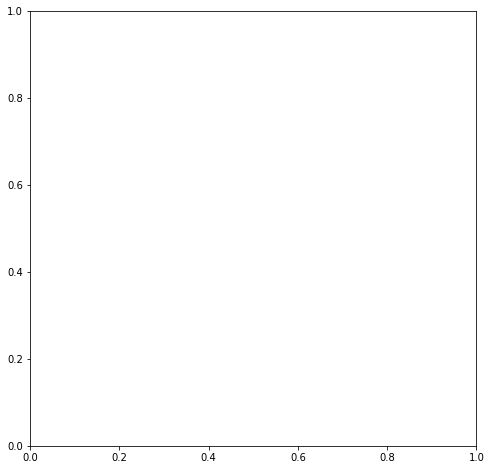

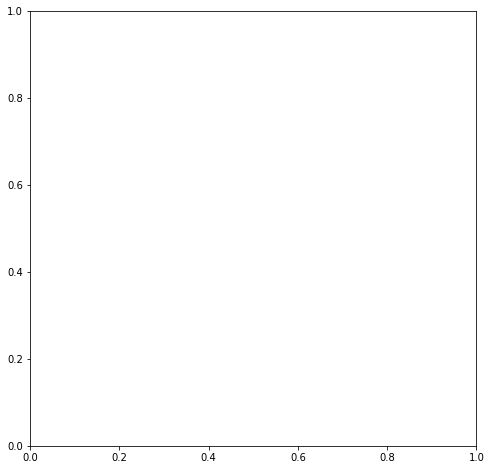

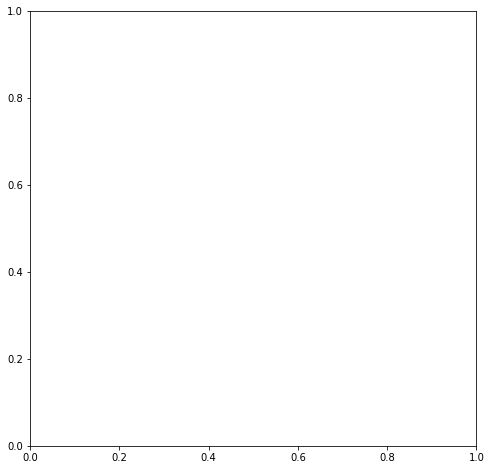

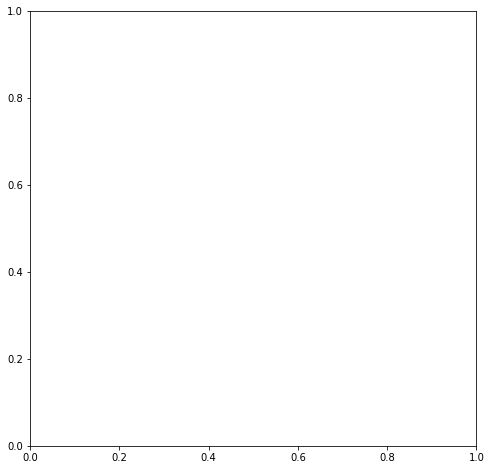

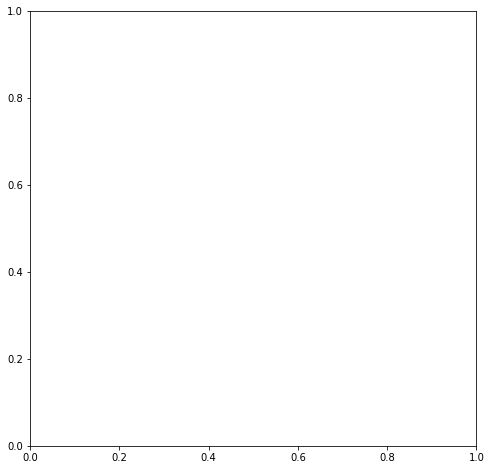

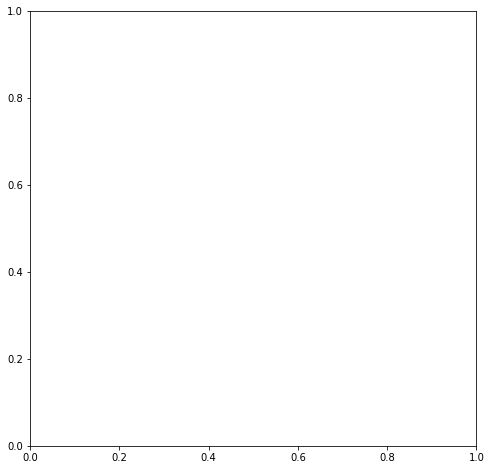

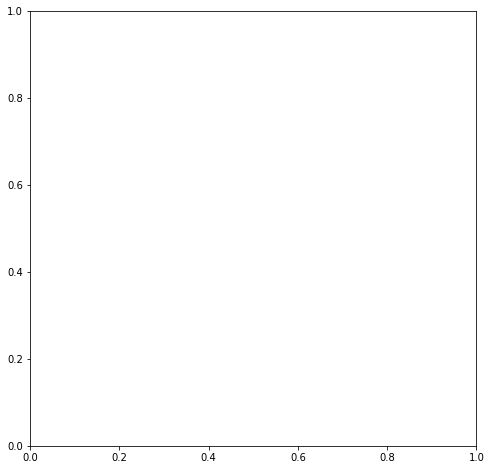

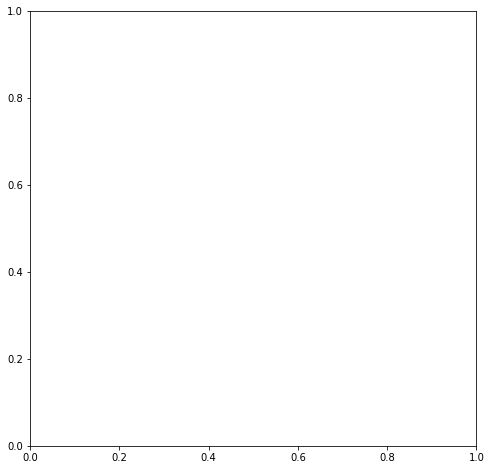

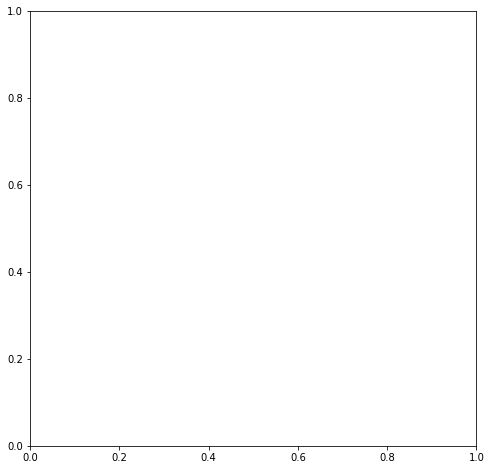

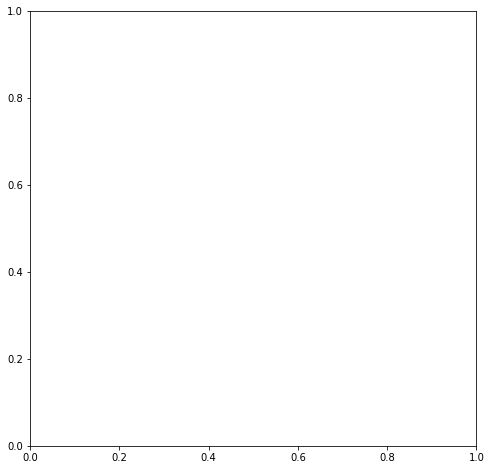

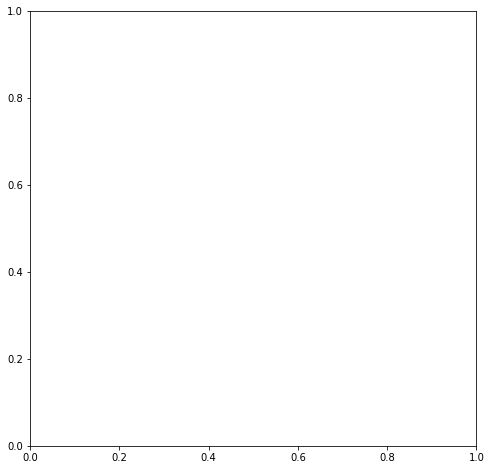

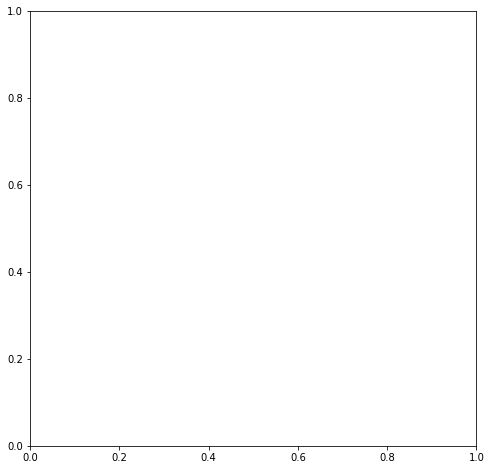

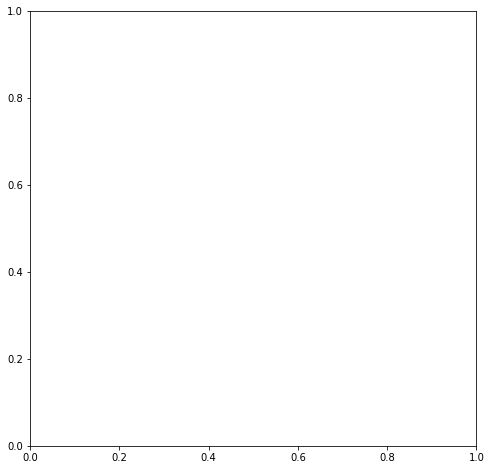

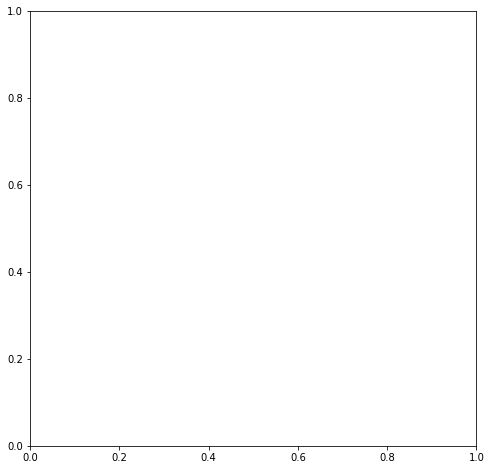

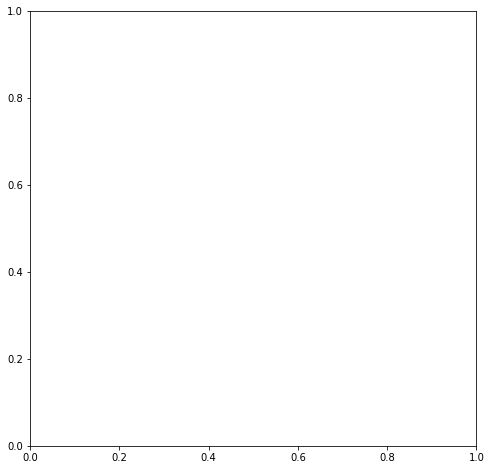

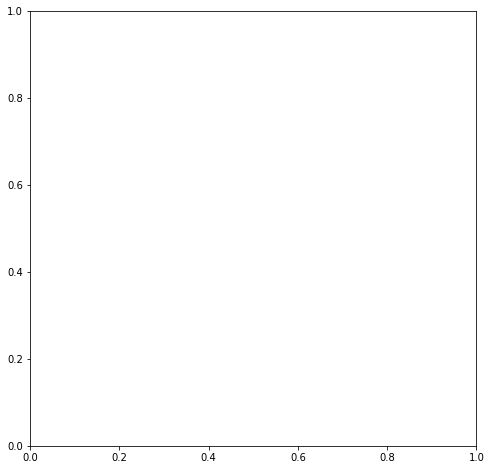

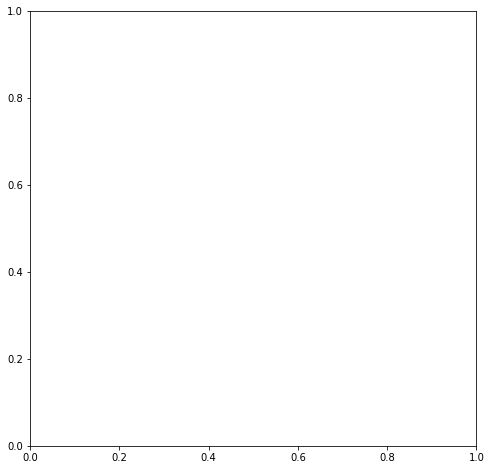

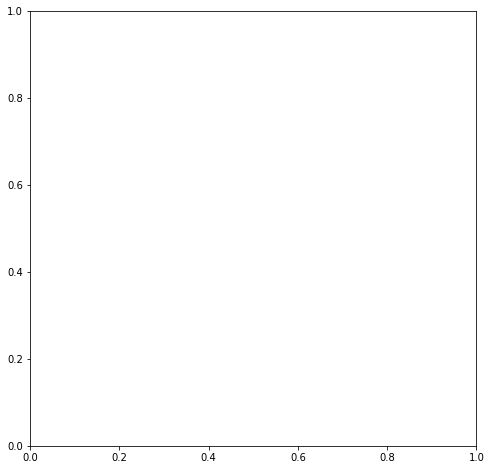

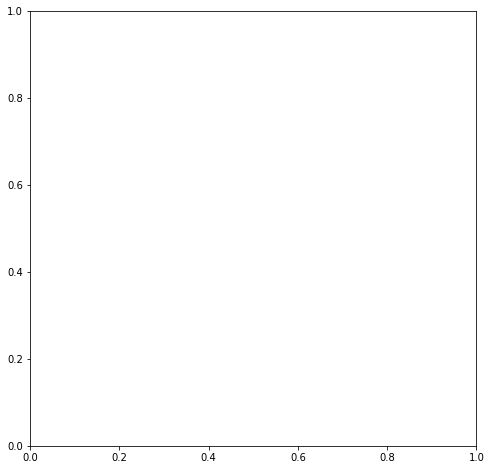

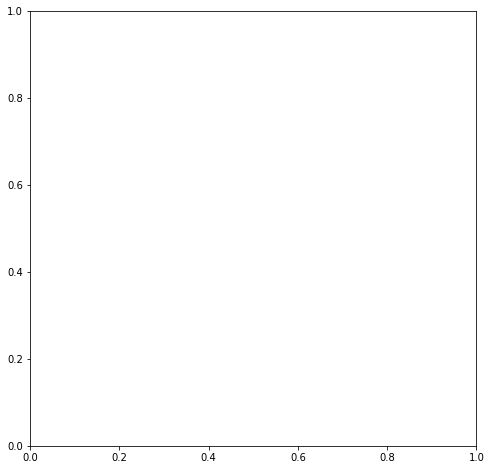

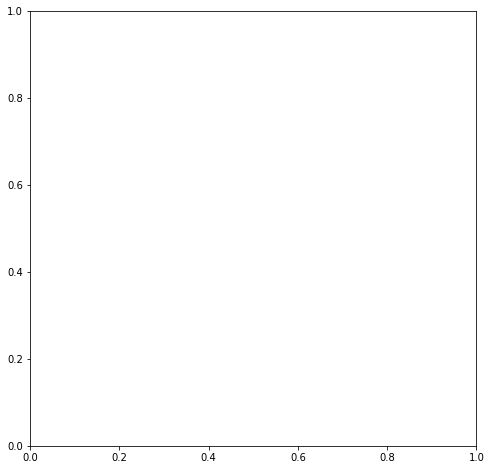

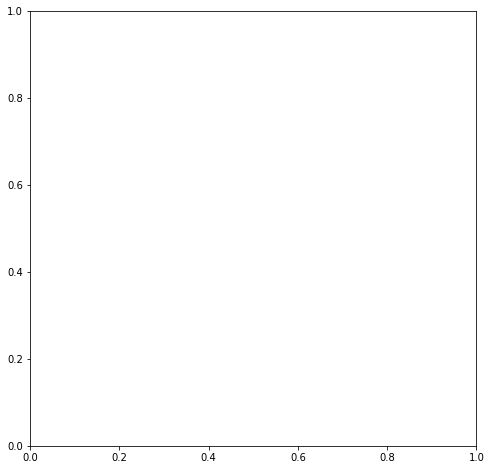

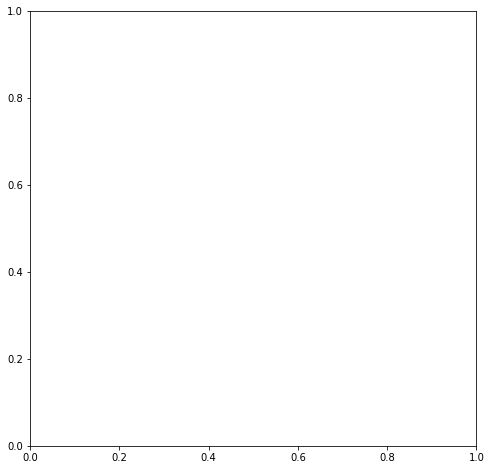

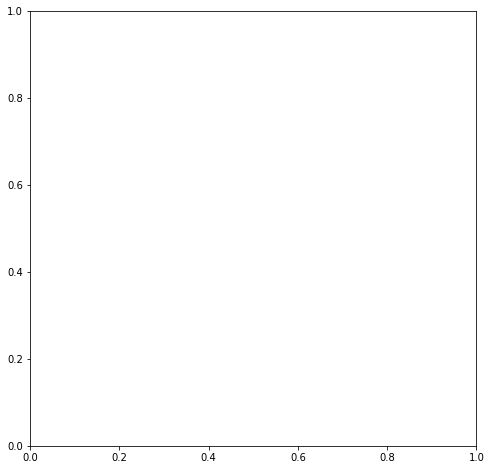

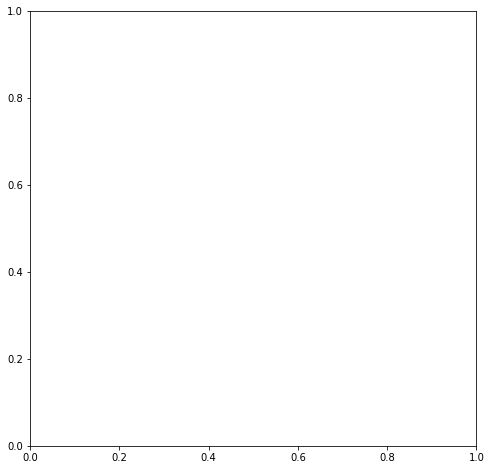

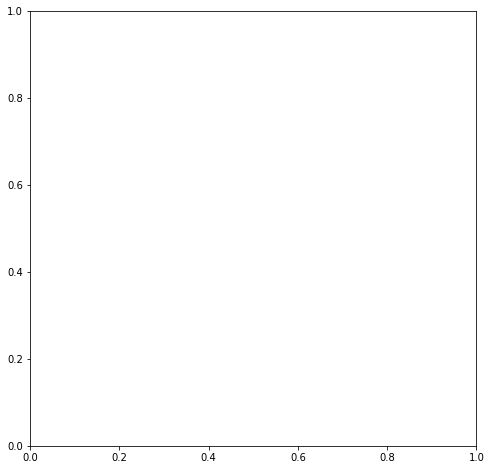

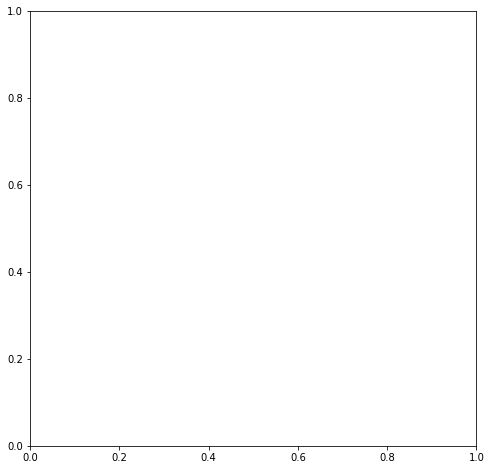

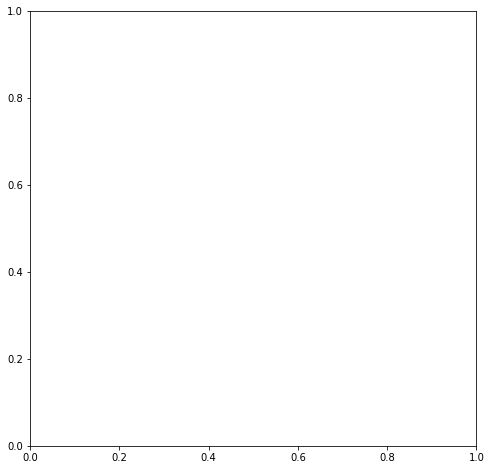

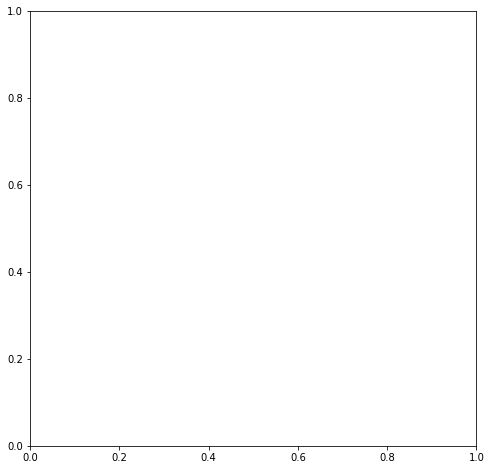

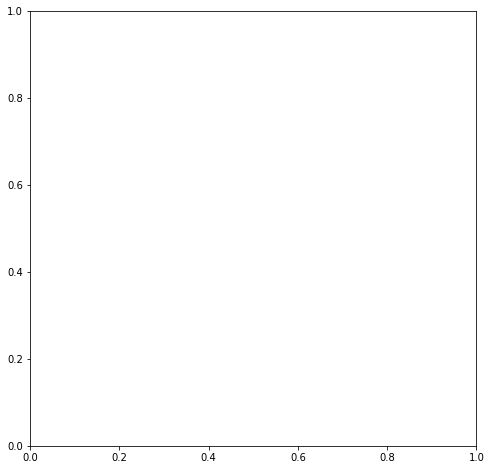

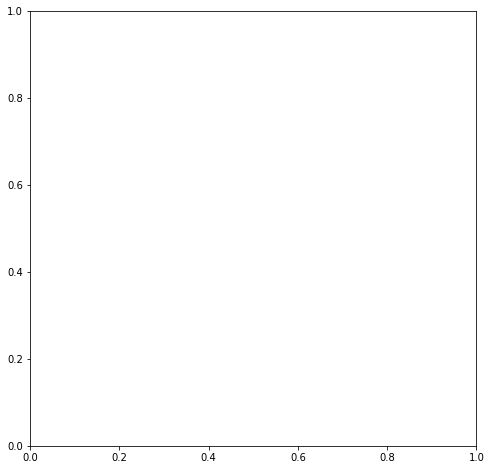

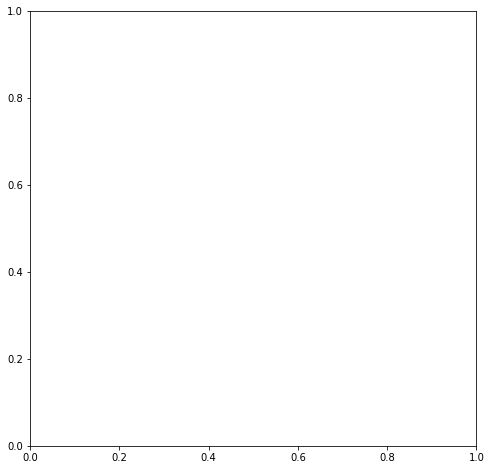

In [29]:
fig_size=8
with_labels=False,
node_size=25,
width=2.5,
arrow_width=.25
for k in range(0,len(F.Q_sim)):
    if k % 5 == 0:
        F.Q = F.Q_sim[k]
        F.G = F.get_net(F.Q)
        F.P = F.P_sim[k]
        F.p = F.p_sim[k]
        F.q = F.q_sim[k]

        p = plt.figure(figsize=(fig_size,fig_size))
        unit = np.zeros(F.P.shape)
        norms = np.zeros(F.N)
        for i in range(0,F.N):
            norms[i] = np.linalg.norm(F.P[i])
            unit[i] = F.P[i]/norms[i]
        rel = np.zeros(F.P.shape)
        for i in range(0,F.N):
            rel[i] = unit[i]*(np.linalg.norm(F.P[i])/max(norms))

        for i in range(0,F.N):
            plt.arrow(F.Q[i,0],F.Q[i,1],rel[i,0],rel[i,1],
                      width=arrow_width,
                      edgecolor='green',
                      facecolor='green')
        G = F.G.copy()
        Q = F.Q.copy()
        node_colors = ['red']

        rel_gamma = F.p/max(norms)
        plt.arrow(F.q[0,0],F.q[0,1],rel_gamma[0,0],rel_gamma[0,1],
                    width=arrow_width,
                    edgecolor='blue',
                    facecolor='blue')
        G.add_node(F.N)
        node_colors = []
        for node in G:
            if node < F.N:
                node_colors.append('red')
            if node == F.N:
                node_colors.append('orange')
        Q = np.append(Q,F.q).reshape(F.N+1,2)
        
        nx.draw_networkx(G,
                        pos=Q,
                        node_color=node_colors,
                        edge_color='black',
                        width=width,
                        node_size=node_size,
                        with_labels=False)
        plt.xlim(min(Q[:,0])-max(rel[:,0]),max(Q[:,0])+max(rel[:,0]))
        plt.ylim(min(Q[:,1])-max(rel[:,1]),max(Q[:,1])+max(rel[:,1]))
        p.savefig('sim_pic/'+str(k)+'.png')
        plt.cla()

In [31]:
import imageio
import os
ids = list()
for i in range(0,len(F.Q_sim)):
    if i % 5 == 0:
        ids.append('sim_pic/'+str(i)+'.png')

images = []
for i in ids:
    images.append(imageio.imread(i))
imageio.mimsave('../Data/Flock.gif', images, 'GIF', duration=0.05)